In [1]:
# Pandas and Numpy libraries
import pandas as pd
import numpy as np
# For preprocessing the data
from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split, GridSearchCV
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy import stats
import warnings 
warnings.filterwarnings( "ignore")

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


### Importing data

In [2]:
df=pd.read_csv("Data_HCP.csv")

### EDA

In [3]:
df.head()

applicant_id  years_of_insurance_with_us  regular_checkup_lasy_year  \
0          5000                           3                          1   
1          5001                           0                          0   
2          5002                           1                          0   
3          5003                           7                          4   
4          5004                           3                          1   

   adventure_sports Occupation  visited_doctor_last_1_year cholesterol_level  \
0                 1    Salried                           2        125 to 150   
1                 0    Student                           4        150 to 175   
2                 0   Business                           4        200 to 225   
3                 0   Business                           2        175 to 200   
4                 0    Student                           2        150 to 175   

   daily_avg_steps  age  heart_decs_history  ...   smoking_status  \
0             4866   28                   1  ...          Unknown   
1             6411   50                   0  ...  formerly smoked   
2             4509   68                   0  ...  formerly smoked   
3             6214   51                   0  ...          Unknown   
4             4938   44                   0  ...     never smoked   

  Year_last_admitted   Location  weight covered_by_any_other_company  Alcohol  \
0                NaN    Chennai      67                            N     Rare   
1                NaN     Jaipur      58                            N     Rare   
2                NaN     Jaipur      73                            N    Daily   
3                NaN    Chennai      71                            Y     Rare   
4             2004.0  Bangalore      74                            N       No   

   exercise  weight_change_in_last_one_year fat_percentage insurance_cost  
0  Moderate                               1             25          20978  
1  Moderate                               3             27           6170  
2   Extreme                               0             32          28382  
3        No                               3             37          27148  
4   Extreme                               0             34          29616  

[5 rows x 24 columns]


#### Shape

In [4]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  25000 
no. of columns:  24


#### Data type of data features

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   applicant_id                    25000 non-null  int64  
 1   years_of_insurance_with_us      25000 non-null  int64  
 2   regular_checkup_lasy_year       25000 non-null  int64  
 3   adventure_sports                25000 non-null  int64  
 4   Occupation                      25000 non-null  object 
 5   visited_doctor_last_1_year      25000 non-null  int64  
 6   cholesterol_level               25000 non-null  object 
 7   daily_avg_steps                 25000 non-null  int64  
 8   age                             25000 non-null  int64  
 9   heart_decs_history              25000 non-null  int64  
 10  other_major_decs_history        25000 non-null  int64  
 11  Gender                          25000 non-null  object 
 12  avg_glucose_level               

**Description**

In [6]:
df.describe().T

count          mean           std     min  \
applicant_id                    25000.0  17499.500000   7217.022701  5000.0   
years_of_insurance_with_us      25000.0      4.089040      2.606612     0.0   
regular_checkup_lasy_year       25000.0      0.773680      1.199449     0.0   
adventure_sports                25000.0      0.081720      0.273943     0.0   
visited_doctor_last_1_year      25000.0      3.104200      1.141663     0.0   
daily_avg_steps                 25000.0   5215.889320   1053.179748  2034.0   
age                             25000.0     44.918320     16.107492    16.0   
heart_decs_history              25000.0      0.054640      0.227281     0.0   
other_major_decs_history        25000.0      0.098160      0.297537     0.0   
avg_glucose_level               25000.0    167.530000     62.729712    57.0   
bmi                             24010.0     31.393328      7.876535    12.3   
Year_last_admitted              13119.0   2003.892217      7.581521  1990.0   
weight                          25000.0     71.610480      9.325183    52.0   
weight_change_in_last_one_year  25000.0      2.517960      1.690335     0.0   
fat_percentage                  25000.0     28.812280      8.632382    11.0   
insurance_cost                  25000.0  27147.407680  14323.691832  2468.0   

                                     25%      50%       75%      max  
applicant_id                    11249.75  17499.5  23749.25  29999.0  
years_of_insurance_with_us          2.00      4.0      6.00      8.0  
regular_checkup_lasy_year           0.00      0.0      1.00      5.0  
adventure_sports                    0.00      0.0      0.00      1.0  
visited_doctor_last_1_year          2.00      3.0      4.00     12.0  
daily_avg_steps                  4543.00   5089.0   5730.00  11255.0  
age                                31.00     45.0     59.00     74.0  
heart_decs_history                  0.00      0.0      0.00      1.0  
other_major_decs_history            0.00      0.0      0.00      1.0  
avg_glucose_level                 113.00    168.0    222.00    277.0  
bmi                                26.10     30.5     35.60    100.6  
Year_last_admitted               1997.00   2004.0   2010.00   2018.0  
weight                             64.00     72.0     78.00     96.0  
weight_change_in_last_one_year      1.00      3.0      4.00      6.0  
fat_percentage                     21.00     31.0     36.00     42.0  
insurance_cost                  16042.00  27148.0  37020.00  67870.0

In [7]:
#from pandas_profiling import ProfileReport
#report = ProfileReport(df)
#report.to_file('Report- Healthcare.html')

In [8]:
stats.shapiro(df.age)

ShapiroResult(statistic=0.9582443833351135, pvalue=0.0)

In [9]:
stats.shapiro(df.avg_glucose_level)

ShapiroResult(statistic=0.9551017880439758, pvalue=0.0)

In [10]:
stats.shapiro(df.weight)

ShapiroResult(statistic=0.9869663715362549, pvalue=5.809783433090692e-42)

In [11]:
stats.shapiro(df.insurance_cost)

ShapiroResult(statistic=0.9703972935676575, pvalue=0.0)

In [12]:
stats.shapiro(df.daily_avg_steps)

ShapiroResult(statistic=0.9576945304870605, pvalue=0.0)

In [13]:
stats.shapiro(df.bmi)

ShapiroResult(statistic=nan, pvalue=1.0)

In [14]:
stats.shapiro(df.fat_percentage)

ShapiroResult(statistic=0.9386458396911621, pvalue=0.0)

**Check for Duplicates**

In [15]:
df.duplicated().sum()

0

In [16]:
df.drop('applicant_id',inplace = True, axis = 1)

**Check for null**

In [17]:
df.isnull().sum()

years_of_insurance_with_us            0
regular_checkup_lasy_year             0
adventure_sports                      0
Occupation                            0
visited_doctor_last_1_year            0
cholesterol_level                     0
daily_avg_steps                       0
age                                   0
heart_decs_history                    0
other_major_decs_history              0
Gender                                0
avg_glucose_level                     0
bmi                                 990
smoking_status                        0
Year_last_admitted                11881
Location                              0
weight                                0
covered_by_any_other_company          0
Alcohol                               0
exercise                              0
weight_change_in_last_one_year        0
fat_percentage                        0
insurance_cost                        0
dtype: int64

**Check for Object Data Type**

In [18]:
#df = df.astype(str)

In [19]:
df.select_dtypes(include='object').head()

Occupation cholesterol_level  Gender   smoking_status   Location  \
0    Salried        125 to 150    Male          Unknown    Chennai   
1    Student        150 to 175    Male  formerly smoked     Jaipur   
2   Business        200 to 225  Female  formerly smoked     Jaipur   
3   Business        175 to 200  Female          Unknown    Chennai   
4    Student        150 to 175    Male     never smoked  Bangalore   

  covered_by_any_other_company Alcohol  exercise  
0                            N    Rare  Moderate  
1                            N    Rare  Moderate  
2                            N   Daily   Extreme  
3                            Y    Rare        No  
4                            N      No   Extreme

### unique values for categorical variables

In [20]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts('%').sort_values())
        print('\n')

OCCUPATION :  3
Salried     0.19244
Business    0.40080
Student     0.40676
Name: Occupation, dtype: float64


CHOLESTEROL_LEVEL :  5
225 to 250    0.08216
175 to 200    0.11524
200 to 225    0.11852
125 to 150    0.33356
150 to 175    0.35052
Name: cholesterol_level, dtype: float64


GENDER :  2
Female    0.34312
Male      0.65688
Name: Gender, dtype: float64


SMOKING_STATUS :  4
smokes             0.15468
formerly smoked    0.17316
Unknown            0.30220
never smoked       0.36996
Name: smoking_status, dtype: float64


LOCATION :  15
Surat          0.06356
Kolkata        0.06480
Pune           0.06488
Lucknow        0.06548
Mumbai         0.06632
Nagpur         0.06652
Kanpur         0.06656
Chennai        0.06676
Guwahati       0.06688
Ahmedabad      0.06708
Delhi          0.06720
Mangalore      0.06788
Bhubaneswar    0.06816
Jaipur         0.06824
Bangalore      0.06968
Name: Location, dtype: float64


COVERED_BY_ANY_OTHER_COMPANY :  2
Y    0.30328
N    0.69672
Name: covered_b

In [21]:
feature_list = ['years_of_insurance_with_us', 'regular_checkup_lasy_year', 'adventure_sports', 
                'visited_doctor_last_1_year', 'heart_decs_history', 
                'other_major_decs_history', 'weight_change_in_last_one_year',
                'Occupation', 'cholesterol_level', 'Gender', 'smoking_status', 'Location', 
                'covered_by_any_other_company', 'Alcohol', 'exercise']

for x in range(len(feature_list)):
        print(feature_list[x].upper(),': ',df[feature_list[x]].nunique())
        print(df[feature_list[x]].value_counts('%').sort_values())
        print('\n')

YEARS_OF_INSURANCE_WITH_US :  9
2    0.07232
6    0.11216
4    0.11384
1    0.11424
7    0.11492
0    0.11648
5    0.11764
8    0.11880
3    0.11960
Name: years_of_insurance_with_us, dtype: float64


REGULAR_CHECKUP_LASY_YEAR :  6
5    0.01392
4    0.03108
3    0.07272
2    0.08792
1    0.18576
0    0.60860
Name: regular_checkup_lasy_year, dtype: float64


ADVENTURE_SPORTS :  2
1    0.08172
0    0.91828
Name: adventure_sports, dtype: float64


VISITED_DOCTOR_LAST_1_YEAR :  12
0     0.00004
12    0.00004
10    0.00024
9     0.00052
8     0.00304
7     0.00756
1     0.01728
6     0.02184
5     0.05060
4     0.26832
3     0.28376
2     0.34676
Name: visited_doctor_last_1_year, dtype: float64


HEART_DECS_HISTORY :  2
1    0.05464
0    0.94536
Name: heart_decs_history, dtype: float64


OTHER_MAJOR_DECS_HISTORY :  2
1    0.09816
0    0.90184
Name: other_major_decs_history, dtype: float64


WEIGHT_CHANGE_IN_LAST_ONE_YEAR :  7
6    0.03632
5    0.08144
1    0.15700
0    0.16048
2    0.16148
3

# Data preprocessing


In [22]:
# Location seem to have same number of counts for each city. Probably same no of entries might 
# have been taken from each city. Hence this variable can be dropped as it will not contribute anything.

In [23]:
#df.drop('Location', inplace = True, axis = 1)

In [24]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['Occupation', 'cholesterol_level', 'Gender', 'smoking_status', 'Location', 'covered_by_any_other_company', 'Alcohol', 'exercise']
['years_of_insurance_with_us', 'regular_checkup_lasy_year', 'adventure_sports', 'visited_doctor_last_1_year', 'daily_avg_steps', 'age', 'heart_decs_history', 'other_major_decs_history', 'avg_glucose_level', 'bmi', 'Year_last_admitted', 'weight', 'weight_change_in_last_one_year', 'fat_percentage', 'insurance_cost']


In [25]:
df[num].describe().T

count          mean           std     min  \
years_of_insurance_with_us      25000.0      4.089040      2.606612     0.0   
regular_checkup_lasy_year       25000.0      0.773680      1.199449     0.0   
adventure_sports                25000.0      0.081720      0.273943     0.0   
visited_doctor_last_1_year      25000.0      3.104200      1.141663     0.0   
daily_avg_steps                 25000.0   5215.889320   1053.179748  2034.0   
age                             25000.0     44.918320     16.107492    16.0   
heart_decs_history              25000.0      0.054640      0.227281     0.0   
other_major_decs_history        25000.0      0.098160      0.297537     0.0   
avg_glucose_level               25000.0    167.530000     62.729712    57.0   
bmi                             24010.0     31.393328      7.876535    12.3   
Year_last_admitted              13119.0   2003.892217      7.581521  1990.0   
weight                          25000.0     71.610480      9.325183    52.0   
weight_change_in_last_one_year  25000.0      2.517960      1.690335     0.0   
fat_percentage                  25000.0     28.812280      8.632382    11.0   
insurance_cost                  25000.0  27147.407680  14323.691832  2468.0   

                                    25%      50%      75%      max  
years_of_insurance_with_us          2.0      4.0      6.0      8.0  
regular_checkup_lasy_year           0.0      0.0      1.0      5.0  
adventure_sports                    0.0      0.0      0.0      1.0  
visited_doctor_last_1_year          2.0      3.0      4.0     12.0  
daily_avg_steps                  4543.0   5089.0   5730.0  11255.0  
age                                31.0     45.0     59.0     74.0  
heart_decs_history                  0.0      0.0      0.0      1.0  
other_major_decs_history            0.0      0.0      0.0      1.0  
avg_glucose_level                 113.0    168.0    222.0    277.0  
bmi                                26.1     30.5     35.6    100.6  
Year_last_admitted               1997.0   2004.0   2010.0   2018.0  
weight                             64.0     72.0     78.0     96.0  
weight_change_in_last_one_year      1.0      3.0      4.0      6.0  
fat_percentage                     21.0     31.0     36.0     42.0  
insurance_cost                  16042.0  27148.0  37020.0  67870.0

In [26]:
df[cat].describe().T

count unique           top   freq
Occupation                    25000      3       Student  10169
cholesterol_level             25000      5    150 to 175   8763
Gender                        25000      2          Male  16422
smoking_status                25000      4  never smoked   9249
Location                      25000     15     Bangalore   1742
covered_by_any_other_company  25000      2             N  17418
Alcohol                       25000      3          Rare  13752
exercise                      25000      3      Moderate  14638

**Univariate Analysis**

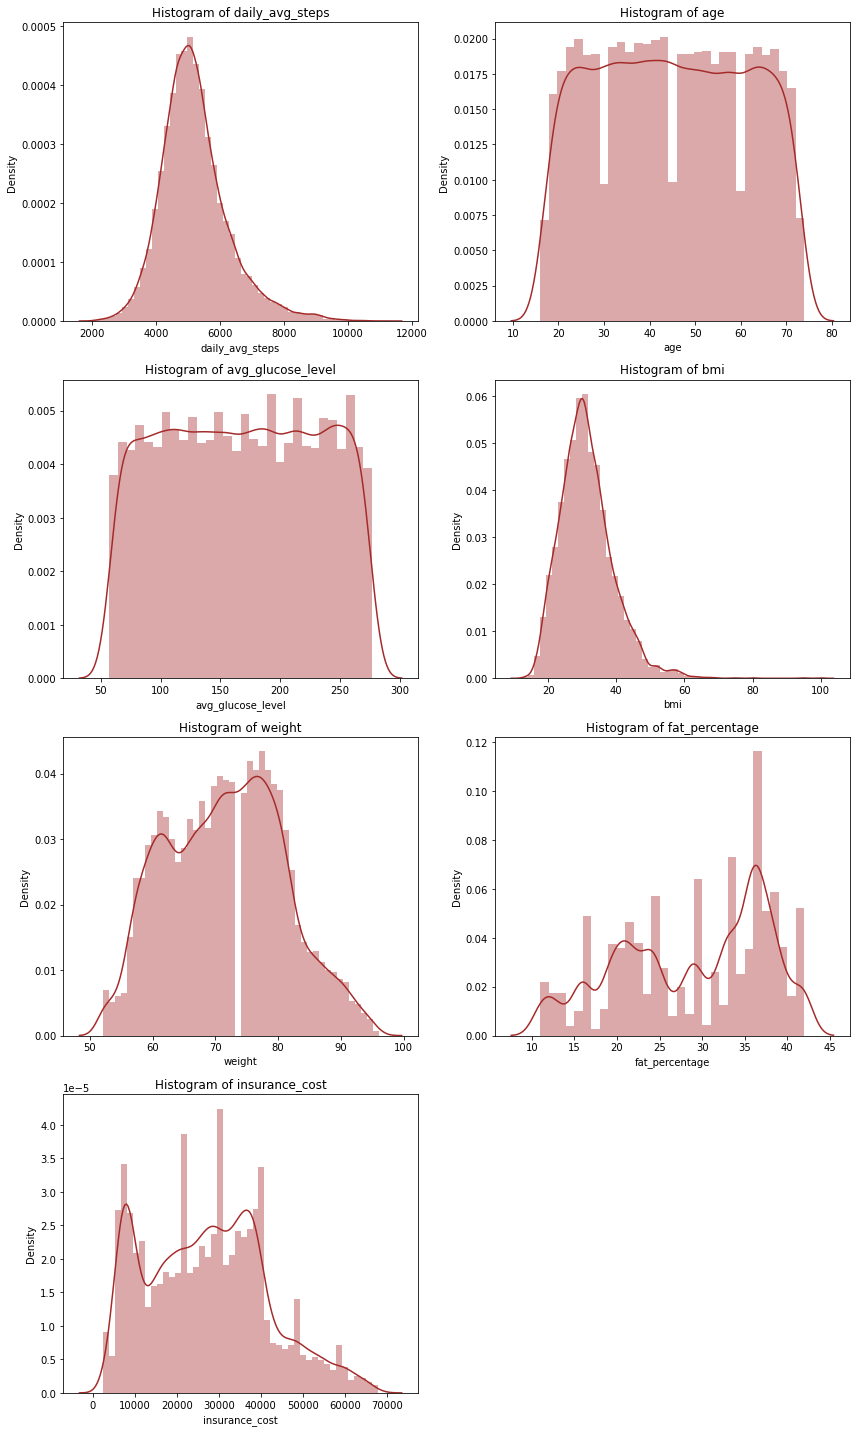

In [27]:
plt.figure(figsize = (12,20))
feature_list = ['daily_avg_steps', 'age', 'avg_glucose_level', 'bmi', 'weight', 'fat_percentage', 'insurance_cost']
for i in range(len(feature_list)):
    plt.subplot(4,2, i + 1)
    sns.distplot(df[feature_list[i]], color = 'brown')
    #sns.histplot(x = df[feature_list[i]], data = df,color = 'orange')
    plt.title('Histogram of {}'.format(feature_list[i])) 
    plt.tight_layout()

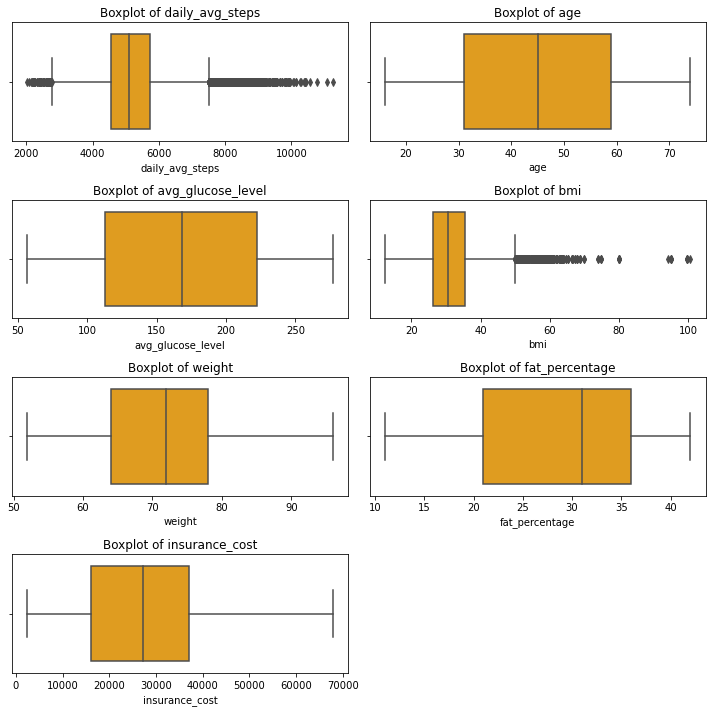

In [28]:
plt.figure(figsize = (10,10))
feature_list = ['daily_avg_steps', 'age', 'avg_glucose_level', 'bmi', 'weight', 'fat_percentage', 'insurance_cost']
for i in range(len(feature_list)):
    plt.subplot(4,2, i + 1)
    sns.boxplot(df[feature_list[i]], color = 'orange')
    #sns.histplot(x = df[feature_list[i]], data = df,color = 'orange')
    plt.title('Boxplot of {}'.format(feature_list[i])) 
    plt.tight_layout()

<AxesSubplot:xlabel='Log(age)', ylabel='Density'>

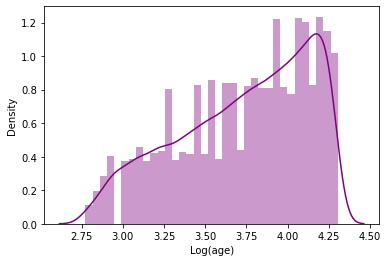

In [29]:
sns.distplot(np.log(df["age"]), axlabel="Log(age)",color = 'purple')

<AxesSubplot:xlabel='Log(avg_glucose_level)', ylabel='Density'>

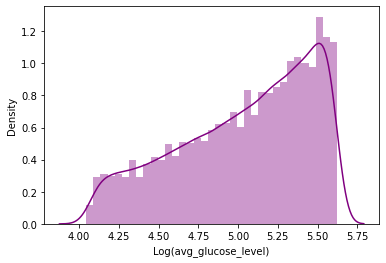

In [30]:
sns.distplot(np.log(df["avg_glucose_level"]), axlabel="Log(avg_glucose_level)",color = 'purple')

<AxesSubplot:xlabel='Log(weight)', ylabel='Density'>

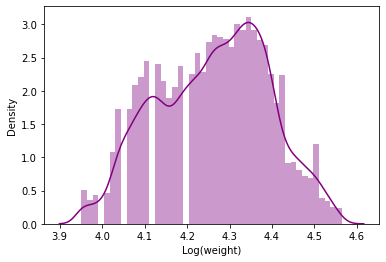

In [31]:
sns.distplot(np.log(df["weight"]), axlabel="Log(weight)",color = 'purple')

<AxesSubplot:xlabel='Log(fat_percentage)', ylabel='Density'>

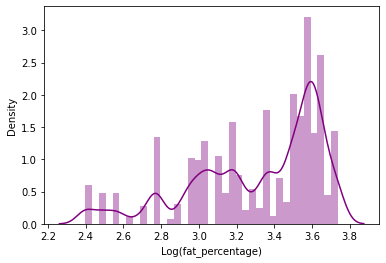

In [32]:
sns.distplot(np.log(df["fat_percentage"]), axlabel="Log(fat_percentage)",color = 'purple')

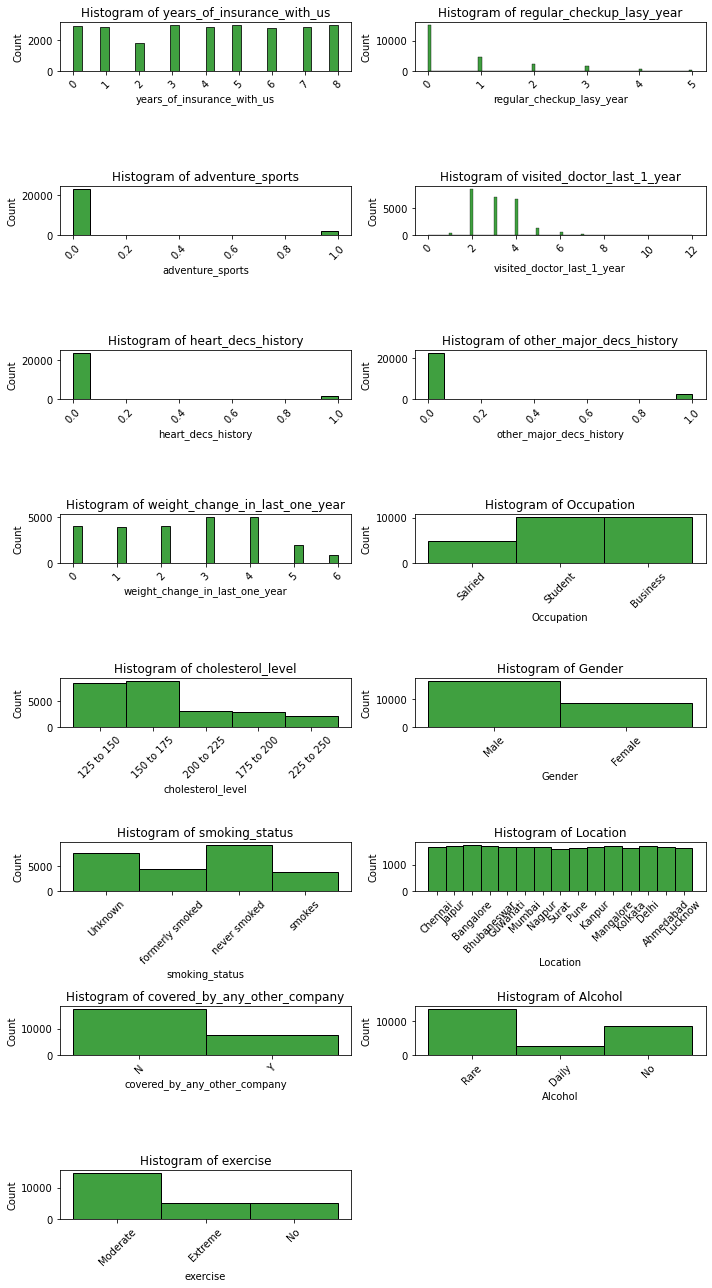

In [33]:
plt.figure(figsize = (10,18))
feature_list = ['years_of_insurance_with_us', 'regular_checkup_lasy_year', 'adventure_sports', 
                'visited_doctor_last_1_year', 'heart_decs_history', 
                'other_major_decs_history', 'weight_change_in_last_one_year',
                'Occupation', 'cholesterol_level', 'Gender', 'smoking_status', 'Location', 
                'covered_by_any_other_company', 'Alcohol', 'exercise']
for i in range(len(feature_list)):
    plt.subplot(8,2, i + 1)
    sns.histplot(x = df[feature_list[i]], data = df,color='green')
    plt.title('Histogram of {}'.format(feature_list[i]))
    plt.xticks(rotation=45)
    plt.tight_layout()

**Bivariate Analysis**

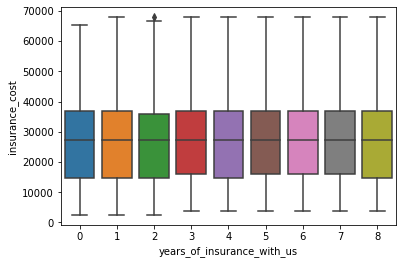

In [34]:
sns.boxplot(df['years_of_insurance_with_us'],df['insurance_cost']);

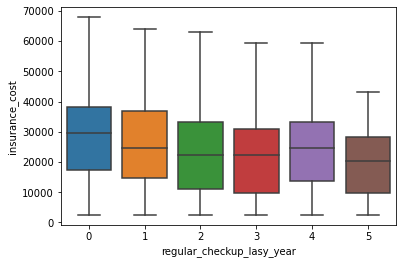

In [35]:
sns.boxplot(df['regular_checkup_lasy_year'],df['insurance_cost']);

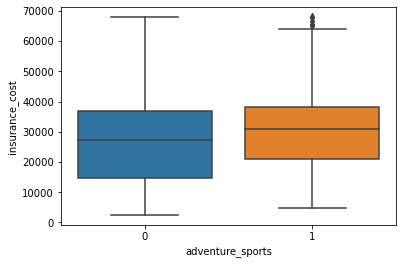

In [36]:
sns.boxplot(df['adventure_sports'],df['insurance_cost']);

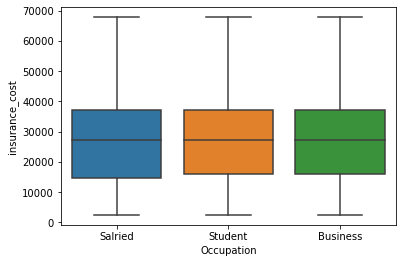

In [37]:
sns.boxplot(df['Occupation'],df['insurance_cost']);

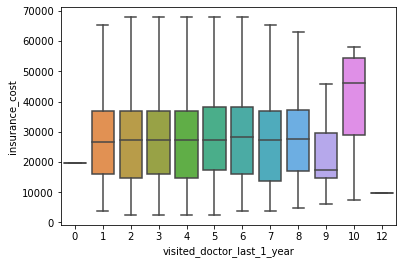

In [38]:
sns.boxplot(df['visited_doctor_last_1_year'],df['insurance_cost']);

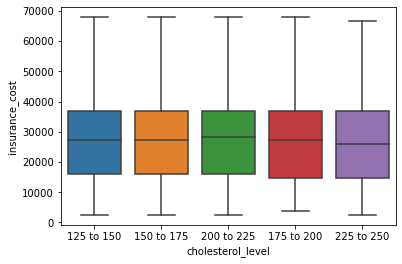

In [39]:
sns.boxplot(df['cholesterol_level'],df['insurance_cost']);

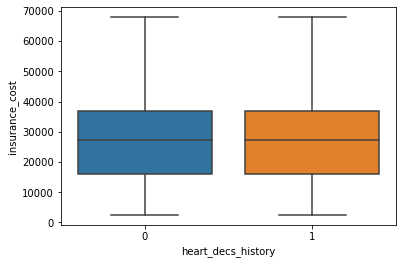

In [40]:
sns.boxplot(df['heart_decs_history'],df['insurance_cost']);

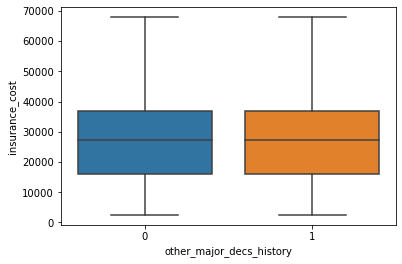

In [41]:
sns.boxplot(df['other_major_decs_history'],df['insurance_cost']);

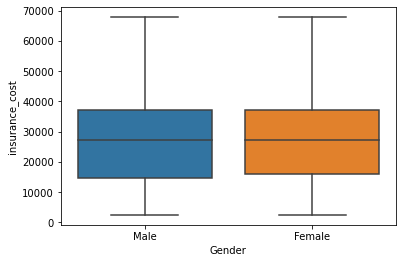

In [42]:
sns.boxplot(df['Gender'],df['insurance_cost']);

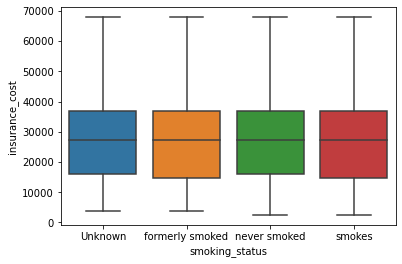

In [43]:
sns.boxplot(df['smoking_status'],df['insurance_cost']);

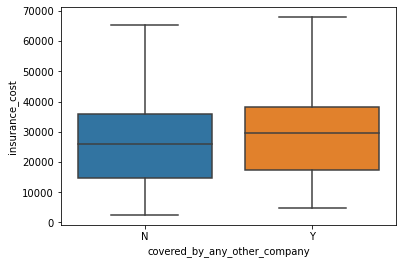

In [44]:
sns.boxplot(df['covered_by_any_other_company'],df['insurance_cost']);

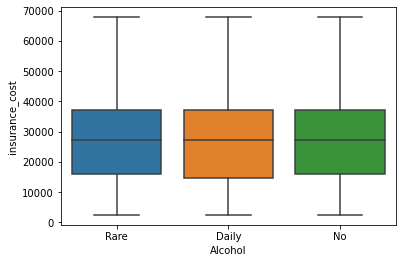

In [45]:
sns.boxplot(df['Alcohol'],df['insurance_cost']);

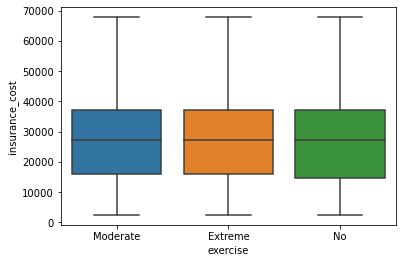

In [46]:
sns.boxplot(df['exercise'],df['insurance_cost']);

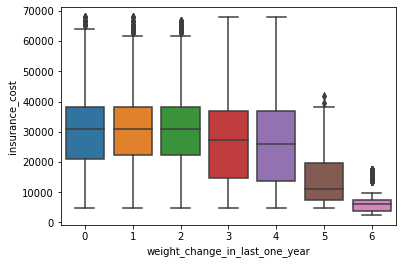

In [47]:
sns.boxplot(df['weight_change_in_last_one_year'],df['insurance_cost']);

In [48]:
#pd.crosstab(df['weight_change_in_last_one_year'],df['insurance_cost'] )

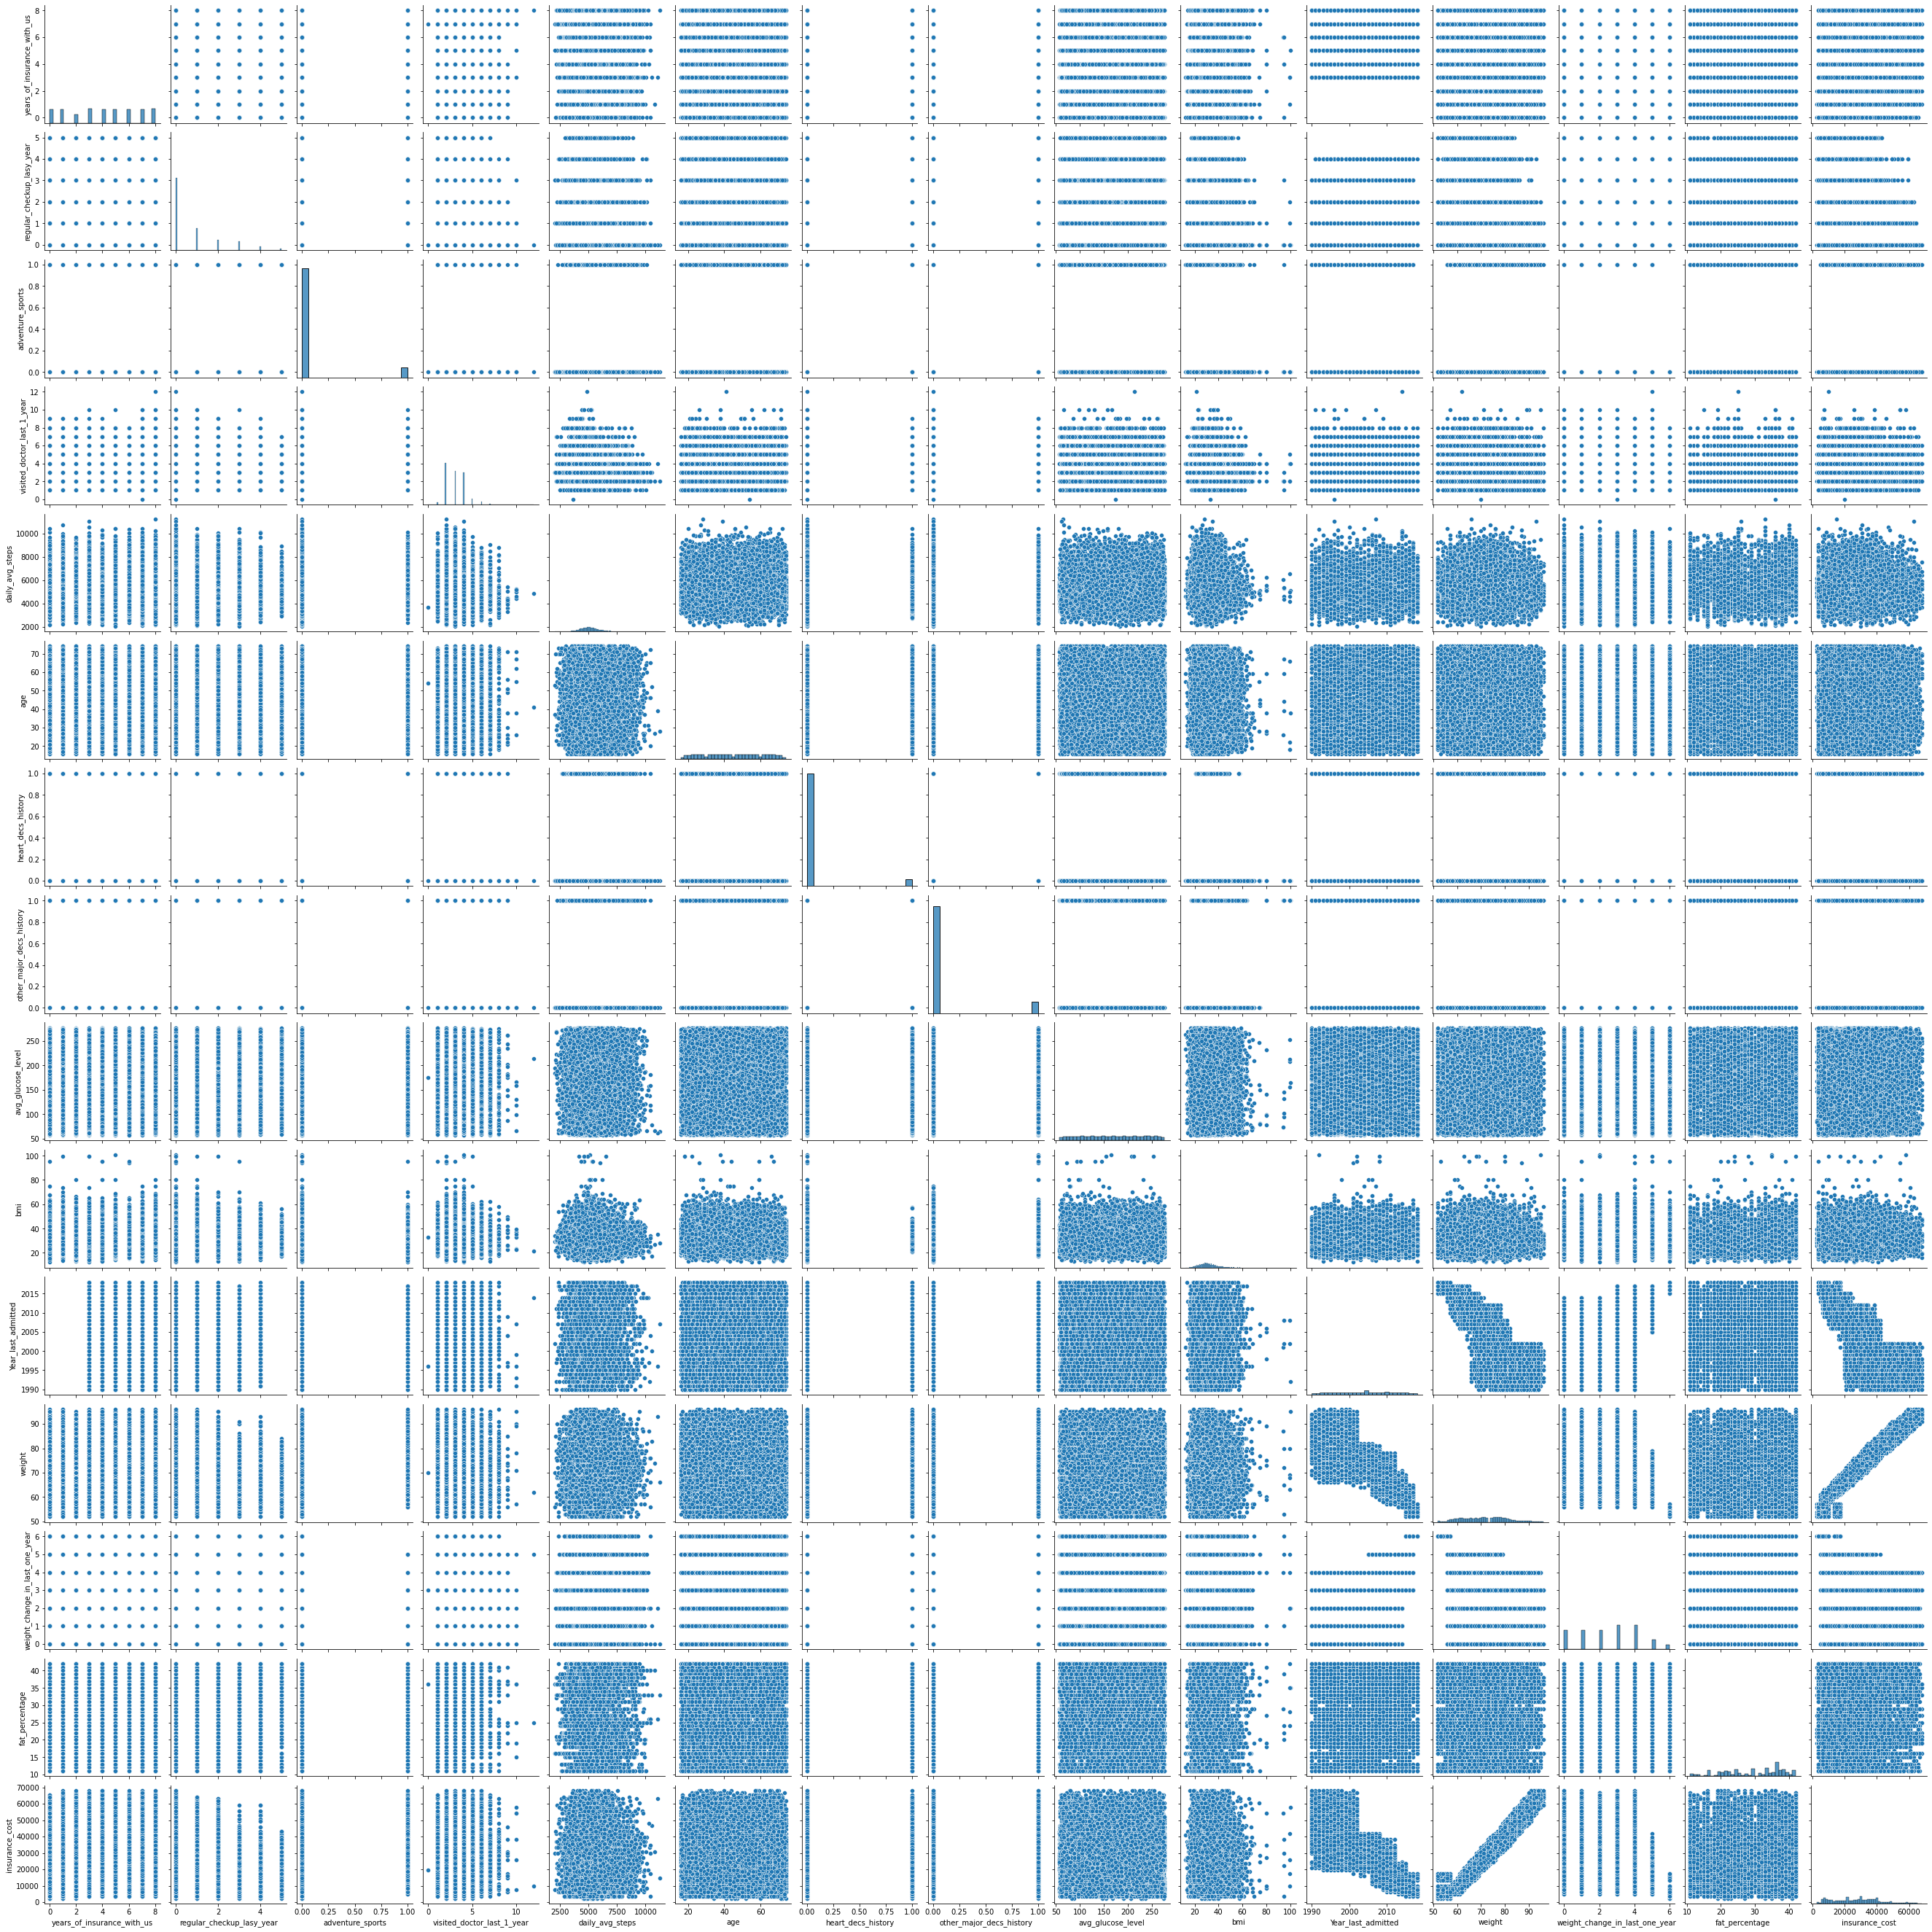

In [49]:
sns.pairplot(df)

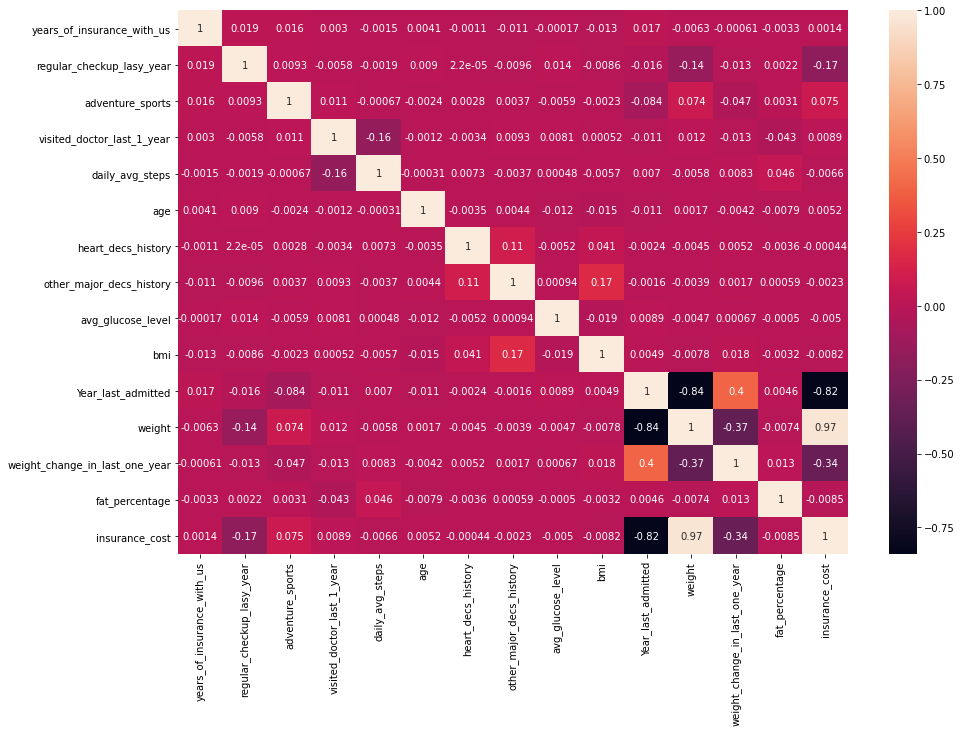

In [50]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

**Check for Outliers**

Shape before Outliers Treatment (25000, 23)


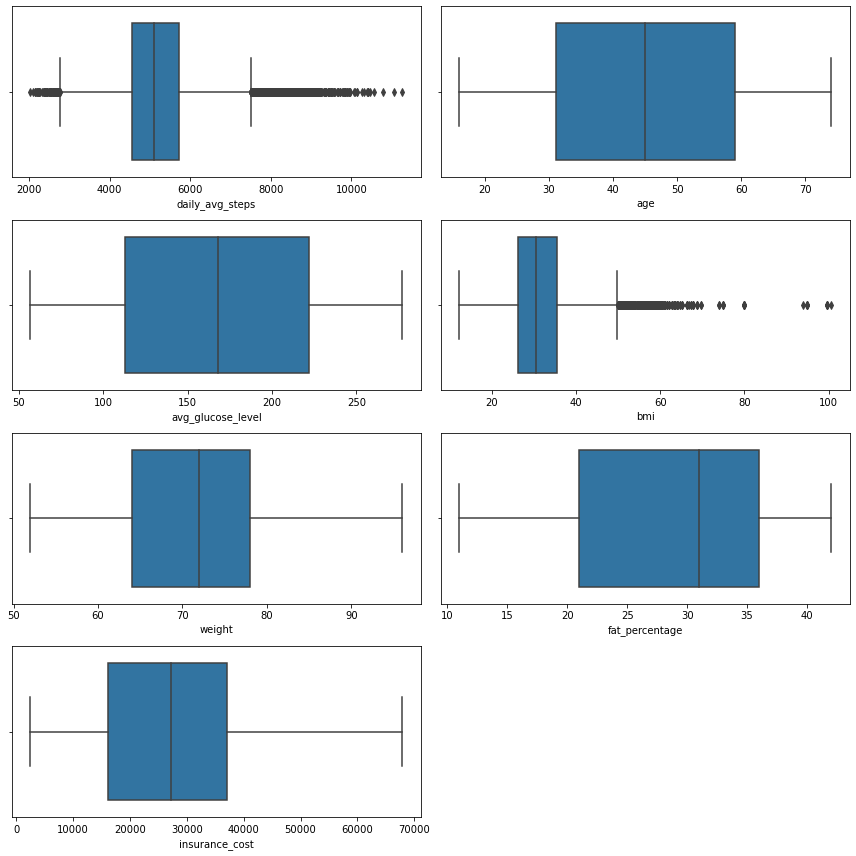

In [51]:
#data_plot=df[['years_of_insurance_with_us', 'regular_checkup_lasy_year', 'visited_doctor_last_1_year', 
           #   'daily_avg_steps', 'age', 'avg_glucose_level', 'bmi', 
            #  'weight', 'weight_change_in_last_one_year', 'fat_percentage', 'insurance_cost']]
data_plot=df[['daily_avg_steps', 'age', 'avg_glucose_level', 'bmi', 'weight', 'fat_percentage', 'insurance_cost']]
fig=plt.figure(figsize=(12,12))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
print('Shape before Outliers Treatment',df.shape)

**Outliers Treatment**

In [52]:
Q1 = df.quantile(0.25) 
Q3 = df.quantile(0.75) 
IQR = Q3 - Q1       
lower_range= Q1-(1.5 * IQR) 
upper_range= Q3+(1.5 * IQR) 

In [53]:
Q1

years_of_insurance_with_us            2.0
regular_checkup_lasy_year             0.0
adventure_sports                      0.0
visited_doctor_last_1_year            2.0
daily_avg_steps                    4543.0
age                                  31.0
heart_decs_history                    0.0
other_major_decs_history              0.0
avg_glucose_level                   113.0
bmi                                  26.1
Year_last_admitted                 1997.0
weight                               64.0
weight_change_in_last_one_year        1.0
fat_percentage                       21.0
insurance_cost                    16042.0
Name: 0.25, dtype: float64

In [54]:
IQR 

years_of_insurance_with_us            4.0
regular_checkup_lasy_year             1.0
adventure_sports                      0.0
visited_doctor_last_1_year            2.0
daily_avg_steps                    1187.0
age                                  28.0
heart_decs_history                    0.0
other_major_decs_history              0.0
avg_glucose_level                   109.0
bmi                                   9.5
Year_last_admitted                   13.0
weight                               14.0
weight_change_in_last_one_year        3.0
fat_percentage                       15.0
insurance_cost                    20978.0
dtype: float64

In [55]:
Q3

years_of_insurance_with_us            6.0
regular_checkup_lasy_year             1.0
adventure_sports                      0.0
visited_doctor_last_1_year            4.0
daily_avg_steps                    5730.0
age                                  59.0
heart_decs_history                    0.0
other_major_decs_history              0.0
avg_glucose_level                   222.0
bmi                                  35.6
Year_last_admitted                 2010.0
weight                               78.0
weight_change_in_last_one_year        4.0
fat_percentage                       36.0
insurance_cost                    37020.0
Name: 0.75, dtype: float64

In [56]:
lower_range

years_of_insurance_with_us           -4.00
regular_checkup_lasy_year            -1.50
adventure_sports                      0.00
visited_doctor_last_1_year           -1.00
daily_avg_steps                    2762.50
age                                 -11.00
heart_decs_history                    0.00
other_major_decs_history              0.00
avg_glucose_level                   -50.50
bmi                                  11.85
Year_last_admitted                 1977.50
weight                               43.00
weight_change_in_last_one_year       -3.50
fat_percentage                       -1.50
insurance_cost                   -15425.00
dtype: float64

In [57]:
upper_range

years_of_insurance_with_us           12.00
regular_checkup_lasy_year             2.50
adventure_sports                      0.00
visited_doctor_last_1_year            7.00
daily_avg_steps                    7510.50
age                                 101.00
heart_decs_history                    0.00
other_major_decs_history              0.00
avg_glucose_level                   385.50
bmi                                  49.85
Year_last_admitted                 2029.50
weight                               99.00
weight_change_in_last_one_year        8.50
fat_percentage                       58.50
insurance_cost                    68487.00
dtype: float64

In [58]:
df['daily_avg_steps']=np.where(df['daily_avg_steps']> 7510.50,7510.50,df['daily_avg_steps'])
df['daily_avg_steps']=np.where(df['daily_avg_steps']< 2762.50,2762.50,df['daily_avg_steps'])

In [59]:
#df['age']=np.where(df['age']> 101,101,df['age'])
#df['age']=np.where(df['age']< -11,-11,df['age'])

# The lower and the upper range for age is unrealistic and hence the given set of values is retained as it is.

In [60]:
df['bmi']=np.where(df['bmi']> 49.85,49.85,df['bmi'])
df['bmi']=np.where(df['bmi']< 11.85,11.85,df['bmi'])

In [61]:
#df['avg_glucose_level']=np.where(df['avg_glucose_level']> 385.5,385.5,df['avg_glucose_level'])
#df['avg_glucose_level']=np.where(df['avg_glucose_level']< -50.5,-50.5,df['avg_glucose_level'])


# The lower and the upper range for avg glucose level is unrealistic and hence the given set of values is retained as it is.

Shape before Outliers Treatment (25000, 23)


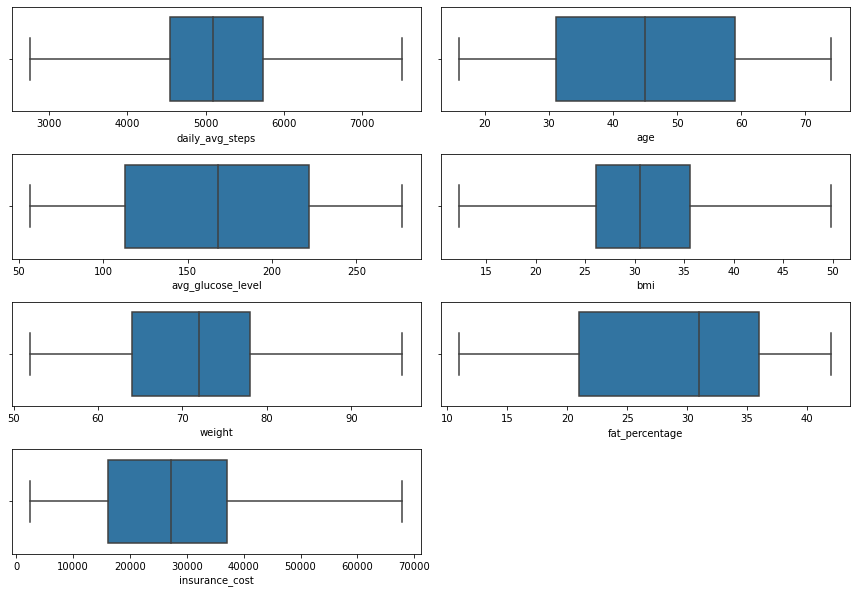

In [62]:
data_plot=df[['daily_avg_steps', 'age', 'avg_glucose_level', 'bmi', 'weight', 'fat_percentage', 'insurance_cost']]
fig=plt.figure(figsize=(12,12))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(6,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
print('Shape before Outliers Treatment',df.shape)

**Null Value Imputation**

In [63]:
df.isnull().sum()

years_of_insurance_with_us            0
regular_checkup_lasy_year             0
adventure_sports                      0
Occupation                            0
visited_doctor_last_1_year            0
cholesterol_level                     0
daily_avg_steps                       0
age                                   0
heart_decs_history                    0
other_major_decs_history              0
Gender                                0
avg_glucose_level                     0
bmi                                 990
smoking_status                        0
Year_last_admitted                11881
Location                              0
weight                                0
covered_by_any_other_company          0
Alcohol                               0
exercise                              0
weight_change_in_last_one_year        0
fat_percentage                        0
insurance_cost                        0
dtype: int64

In [64]:
## df.age=df.age.fillna(df.age.mean())

In [65]:
#impute=['bmi']

In [66]:
df['bmi'].fillna(df['bmi'].median(),inplace=True)

In [67]:
df.isnull().sum()

years_of_insurance_with_us            0
regular_checkup_lasy_year             0
adventure_sports                      0
Occupation                            0
visited_doctor_last_1_year            0
cholesterol_level                     0
daily_avg_steps                       0
age                                   0
heart_decs_history                    0
other_major_decs_history              0
Gender                                0
avg_glucose_level                     0
bmi                                   0
smoking_status                        0
Year_last_admitted                11881
Location                              0
weight                                0
covered_by_any_other_company          0
Alcohol                               0
exercise                              0
weight_change_in_last_one_year        0
fat_percentage                        0
insurance_cost                        0
dtype: int64

**Processing the column 'Year_last_admitted'**

In [68]:
df['admitted_in_hospital']=np.where(df['Year_last_admitted'].notnull() , '1', '0')

In [69]:
df['admitted_in_hospital'].head(20)

0     0
1     0
2     0
3     0
4     1
5     1
6     1
7     0
8     1
9     0
10    1
11    1
12    1
13    1
14    0
15    0
16    0
17    0
18    1
19    0
Name: admitted_in_hospital, dtype: object

In [70]:
df.drop('Year_last_admitted',axis=1,inplace = True)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   years_of_insurance_with_us      25000 non-null  int64  
 1   regular_checkup_lasy_year       25000 non-null  int64  
 2   adventure_sports                25000 non-null  int64  
 3   Occupation                      25000 non-null  object 
 4   visited_doctor_last_1_year      25000 non-null  int64  
 5   cholesterol_level               25000 non-null  object 
 6   daily_avg_steps                 25000 non-null  float64
 7   age                             25000 non-null  int64  
 8   heart_decs_history              25000 non-null  int64  
 9   other_major_decs_history        25000 non-null  int64  
 10  Gender                          25000 non-null  object 
 11  avg_glucose_level               25000 non-null  int64  
 12  bmi                             

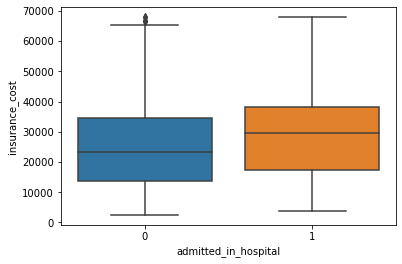

In [72]:
sns.boxplot(df['admitted_in_hospital'],df['insurance_cost']);

**Get dummies**

In [73]:
df =pd.get_dummies(df, columns=["adventure_sports",'heart_decs_history', 'other_major_decs_history', 
                               'Gender', 'covered_by_any_other_company','admitted_in_hospital' ],drop_first=True)

In [74]:
df =pd.get_dummies(df, columns=['Occupation','smoking_status' ])

**Converting other objects to categorical codes**

In [75]:
df['cholesterol_level']=np.where(df['cholesterol_level'] =='125 to 150', '1', df['cholesterol_level'])
df['cholesterol_level']=np.where(df['cholesterol_level'] =='150 to 175', '2', df['cholesterol_level'])
df['cholesterol_level']=np.where(df['cholesterol_level'] =='175 to 200', '3', df['cholesterol_level'])
df['cholesterol_level']=np.where(df['cholesterol_level'] =='200 to 225', '4', df['cholesterol_level'])
df['cholesterol_level']=np.where(df['cholesterol_level'] =='225 to 250', '5', df['cholesterol_level'])

In [76]:
df['Alcohol']=np.where(df['Alcohol'] =='No', '1', df['Alcohol'])
df['Alcohol']=np.where(df['Alcohol'] =='Rare', '2', df['Alcohol'])
df['Alcohol']=np.where(df['Alcohol'] =='Daily', '3', df['Alcohol'])

In [77]:
df['exercise']=np.where(df['exercise'] =='No', '1', df['exercise'])
df['exercise']=np.where(df['exercise'] =='Moderate', '2', df['exercise'])
df['exercise']=np.where(df['exercise'] =='Extreme', '3', df['exercise'])

In [78]:
df['cholesterol_level'] = df['cholesterol_level'].astype('int64')
df['Alcohol'] = df['Alcohol'].astype('int64')
df['exercise'] = df['exercise'].astype('int64')
#df['admitted_in_hospital'] = df['admitted_in_hospital'].astype('int64')

In [79]:
df.drop('Location',axis = 1,inplace=True)

In [80]:
#**Grouping the Glucose Level**

In [81]:
#bins = [10,99,125,500]
#label =['Normal','Pre-diabetes', 'Diabetes']
#label =['1','2', '3']
#df1['Diabetes_Details'] = pd.cut(df1['avg_glucose_level'],bins,right=False,labels=label)
#df1.head(20)

In [82]:
#**Grouping the BMI**

In [83]:
#bins = [5,18.5,24.9,29.9,1000]
#label =['Underweight','Healthy weight', 'Over weight','Obesity']
#df1['Weight_status'] = pd.cut(df1['bmi'],bins,right=False,labels=label)
#df1.head(20)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   years_of_insurance_with_us      25000 non-null  int64  
 1   regular_checkup_lasy_year       25000 non-null  int64  
 2   visited_doctor_last_1_year      25000 non-null  int64  
 3   cholesterol_level               25000 non-null  int64  
 4   daily_avg_steps                 25000 non-null  float64
 5   age                             25000 non-null  int64  
 6   avg_glucose_level               25000 non-null  int64  
 7   bmi                             25000 non-null  float64
 8   weight                          25000 non-null  int64  
 9   Alcohol                         25000 non-null  int64  
 10  exercise                        25000 non-null  int64  
 11  weight_change_in_last_one_year  25000 non-null  int64  
 12  fat_percentage                  

**Apply K-Means clustering**

In [85]:
from sklearn.cluster import KMeans 

In [86]:
wss =[] 
for i in range(1,16):
    KM = KMeans(n_clusters=i,random_state = 0 )
    KM.fit(df)
    wss.append(KM.inertia_)

In [87]:
wss

[5152610890560.713,
 1656054127527.6562,
 811146640805.0068,
 423572454499.9791,
 279294541132.4297,
 206409978392.82568,
 155407225665.72748,
 125580818078.79338,
 108177565392.9335,
 93860499181.41626,
 80644935684.61719,
 70647141442.05667,
 63792704561.339355,
 59279622290.84974,
 55143035096.56807]

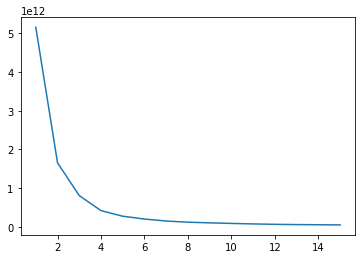

In [88]:
plt.plot(range(1,16), wss);

From the above plot of WSS ( Within sum of squares), there is significant slope upto k = 3 and after which the slope is quite less. Hence the optimal no of cluster is 3 from the above plot of wss or elbow curve.

In [89]:
df.head(10)

years_of_insurance_with_us  regular_checkup_lasy_year  \
0                           3                          1   
1                           0                          0   
2                           1                          0   
3                           7                          4   
4                           3                          1   
5                           8                          0   
6                           8                          0   
7                           1                          0   
8                           8                          1   
9                           4                          3   

   visited_doctor_last_1_year  cholesterol_level  daily_avg_steps  age  \
0                           2                  1           4866.0   28   
1                           4                  2           6411.0   50   
2                           4                  4           4509.0   68   
3                           2                  3           6214.0   51   
4                           2                  2           4938.0   44   
5                           2                  5           5306.0   39   
6                           4                  1           4676.0   40   
7                           4                  2           7448.0   46   
8                           4                  1           5632.0   45   
9                           3                  1           4130.0   38   

   avg_glucose_level   bmi  weight  Alcohol  ...  Gender_Male  \
0                 97  31.2      67        2  ...            1   
1                212  34.2      58        2  ...            1   
2                166  40.4      73        3  ...            0   
3                109  22.9      71        2  ...            0   
4                118  26.5      74        1  ...            1   
5                155  38.0      78        2  ...            1   
6                 80  28.7      81        1  ...            1   
7                245  26.0      72        2  ...            0   
8                126  24.4      67        2  ...            1   
9                 83  46.0      63        3  ...            0   

   covered_by_any_other_company_Y  admitted_in_hospital_1  \
0                               0                       0   
1                               0                       0   
2                               0                       0   
3                               1                       0   
4                               0                       1   
5                               1                       1   
6                               0                       1   
7                               0                       0   
8                               1                       1   
9                               0                       0   

   Occupation_Business  Occupation_Salried  Occupation_Student  \
0                    0                   1                   0   
1                    0                   0                   1   
2                    1                   0                   0   
3                    1                   0                   0   
4                    0                   0                   1   
5                    0                   1                   0   
6                    0                   0                   1   
7                    0                   0                   1   
8                    0                   1                   0   
9                    0                   1                   0   

   smoking_status_Unknown  smoking_status_formerly smoked  \
0                       1                               0   
1                       0                               1   
2                       0                               1   
3                       1                               0   
4                       0                               0   
5                       1                     

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   years_of_insurance_with_us      25000 non-null  int64  
 1   regular_checkup_lasy_year       25000 non-null  int64  
 2   visited_doctor_last_1_year      25000 non-null  int64  
 3   cholesterol_level               25000 non-null  int64  
 4   daily_avg_steps                 25000 non-null  float64
 5   age                             25000 non-null  int64  
 6   avg_glucose_level               25000 non-null  int64  
 7   bmi                             25000 non-null  float64
 8   weight                          25000 non-null  int64  
 9   Alcohol                         25000 non-null  int64  
 10  exercise                        25000 non-null  int64  
 11  weight_change_in_last_one_year  25000 non-null  int64  
 12  fat_percentage                  

**Train Test Split**

In [91]:
# Copy all the predictor variables into X dataframe
X = df.drop('insurance_cost', axis=1)

# Copy target into the y dataframe. 
y = pd.DataFrame(df['insurance_cost'])

In [92]:
# Split X and y into training and test set in 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [93]:

from sklearn.preprocessing import StandardScaler

ss=StandardScaler() 
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.transform(x_test)
y_train_scaled = ss.fit_transform(y_train)
y_test_scaled=ss.transform(y_test)

In [94]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn import tree
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [95]:
LR = LinearRegression()

ANNR = MLPRegressor(hidden_layer_sizes=(50),random_state=123, max_iter=10000)#you are free to tweak the layer sizes
DTR = tree.DecisionTreeRegressor(random_state=123)
KNNR=KNeighborsRegressor()

RFR = RandomForestRegressor(random_state=123)
ADB = AdaBoostRegressor(n_estimators=100,random_state=1)
GB = GradientBoostingRegressor(random_state=1)

In [96]:
LR.fit(x_train,y_train)
LR_train_score = LR.score(x_train, y_train)
LR_test_score = LR.score(x_test, y_test)
LR_RMSE_train = np.sqrt(mean_squared_error(y_train,LR.predict(x_train)))
LR_RMSE_test = np.sqrt(mean_squared_error(y_test,LR.predict(x_test)))
LR_MAPE = np.mean((np.abs(y_test - LR.predict(x_test)))/y_test*100)
##L = np.mean((np.abs(y_test - LR.predict(x_test)))/y_test*100)

print('Train RMSE :', LR_RMSE_train,'\nTest RMSE : ',LR_RMSE_test,'\nTraining Score : ',LR_train_score,
      '\nTest Score : ',LR_test_score,'\nMAPE : ', LR_MAPE)

for idx, col_name in enumerate(x_train.columns):
    print("\nThe coefficient for {} is {}".format(col_name, LR.coef_[0][idx]))
    
intercept = LR.intercept_[0]

print("\nThe intercept for our model is {}".format(intercept))   


Train RMSE : 3371.1507774087836 
Test RMSE :  3328.6917250873416 
Training Score :  0.9449592237785229 
Test Score :  0.9451689195379764 
MAPE :  insurance_cost    15.092896
dtype: float64

The coefficient for years_of_insurance_with_us is -92.76851845862016

The coefficient for regular_checkup_lasy_year is -362.4425714572958

The coefficient for visited_doctor_last_1_year is -36.285623436039664

The coefficient for cholesterol_level is 35.985015063126895

The coefficient for daily_avg_steps is -0.0329739651415367

The coefficient for age is 2.817296434034552

The coefficient for avg_glucose_level is 0.33007836860593515

The coefficient for bmi is -0.7275915985000901

The coefficient for weight is 1485.7024276932707

The coefficient for Alcohol is 16.96734911893072

The coefficient for exercise is -6.247095047195427

The coefficient for weight_change_in_last_one_year is 164.62714694708356

The coefficient for fat_percentage is -0.5454283372680868

The coefficient for adventure_sports_1

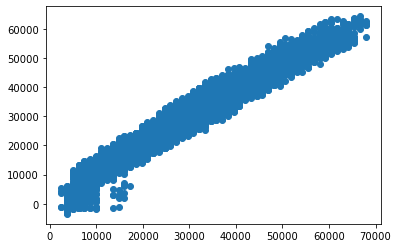

In [97]:
plt.scatter(y_test, LR.predict(x_test))

In [98]:
# concatenate X and y into a single dataframe
data_train = pd.concat([x_train, y_train], axis=1)
data_test=pd.concat([x_test,y_test],axis=1)
data_train.head()

years_of_insurance_with_us  regular_checkup_lasy_year  \
4289                            0                          2   
19621                           6                          2   
14965                           6                          0   
12321                           6                          1   
6269                            4                          4   

       visited_doctor_last_1_year  cholesterol_level  daily_avg_steps  age  \
4289                            4                  2           5245.0   45   
19621                           3                  5           7510.5   60   
14965                           4                  2           5828.0   41   
12321                           3                  1           4463.0   55   
6269                            3                  2           7510.5   25   

       avg_glucose_level   bmi  weight  Alcohol  ...  \
4289                 130  35.4      74        2  ...   
19621                251  31.1      67        2  ...   
14965                 67  30.5      83        2  ...   
12321                263  32.7      84        1  ...   
6269                 147  37.9      79        2  ...   

       covered_by_any_other_company_Y  admitted_in_hospital_1  \
4289                                0                       0   
19621                               1                       0   
14965                               0                       1   
12321                               0                       1   
6269                                0                       1   

       Occupation_Business  Occupation_Salried  Occupation_Student  \
4289                     0                   0                   1   
19621                    0                   1                   0   
14965                    1                   0                   0   
12321                    0                   1                   0   
6269                     1                   0                   0   

       smoking_status_Unknown  smoking_status_formerly smoked  \
4289                        0                               0   
19621                       1                               0   
14965                       0                               0   
12321                       0                               1   
6269                        0                               0   

       smoking_status_never smoked  smoking_status_smokes  insurance_cost  
4289                             0                      1           28382  
19621                            0                      0           23446  
14965                            0                      1           46892  
12321                            0                      0           40722  
6269                             1                      0           32084  

[5 rows x 27 columns]

In [99]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17500 entries, 4289 to 235
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   years_of_insurance_with_us      17500 non-null  int64  
 1   regular_checkup_lasy_year       17500 non-null  int64  
 2   visited_doctor_last_1_year      17500 non-null  int64  
 3   cholesterol_level               17500 non-null  int64  
 4   daily_avg_steps                 17500 non-null  float64
 5   age                             17500 non-null  int64  
 6   avg_glucose_level               17500 non-null  int64  
 7   bmi                             17500 non-null  float64
 8   weight                          17500 non-null  int64  
 9   Alcohol                         17500 non-null  int64  
 10  exercise                        17500 non-null  int64  
 11  weight_change_in_last_one_year  17500 non-null  int64  
 12  fat_percentage                 

### Fitting a linear model using statsmodel

In [100]:
import statsmodels.api as sm

# Statsmodel api does not add a constant by default. We need to add it explicitly.
x_train_st = sm.add_constant(x_train)
# Add constant to test data
x_test_st = sm.add_constant(x_test)


def build_ols_model(train):
    # Create the model
    olsmodel = sm.OLS(y_train, train)
    return olsmodel.fit()


olsmodel1 = build_ols_model(x_train_st)
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.250e+04
Date:                Fri, 01 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:26:18   Log-Likelihood:            -1.6698e+05
No. Observations:               17500   AIC:                         3.340e+05
Df Residuals:                   17475   BIC:                         3.342e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [101]:
olsmodel1.params

const                            -50369.809435
years_of_insurance_with_us          -92.768518
regular_checkup_lasy_year          -362.442571
visited_doctor_last_1_year          -36.285623
cholesterol_level                    35.985015
daily_avg_steps                      -0.032974
age                                   2.817296
avg_glucose_level                     0.330078
bmi                                  -0.727592
weight                             1485.702428
Alcohol                              16.967349
exercise                             -6.247095
weight_change_in_last_one_year      164.627147
fat_percentage                       -0.545428
adventure_sports_1                  125.594669
heart_decs_history_1                122.909527
other_major_decs_history_1           65.476329
Gender_Male                          52.179108
covered_by_any_other_company_Y     1144.260893
admitted_in_hospital_1              762.963003
Occupation_Business              -16849.769954
Occupation_Sa

In [102]:
# Calculate MSE & Root Mean Squared Error - RMSE on training data
mse = np.mean((olsmodel1.predict(x_train_st)-data_train['insurance_cost'])**2)
np.sqrt(mse)

3371.1507774087795

In [103]:
# Calculate MSE & Root Mean Squared Error - RMSE on test data
mse = np.mean((olsmodel1.predict(x_test_st)-data_test['insurance_cost'])**2)
np.sqrt(mse)


3328.691725087308

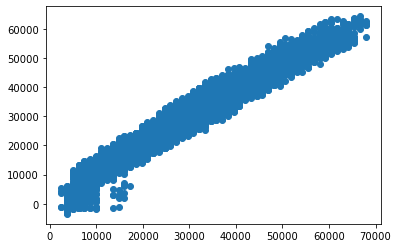

In [104]:
plt.scatter(data_test['insurance_cost'],olsmodel1.predict(x_test_st))


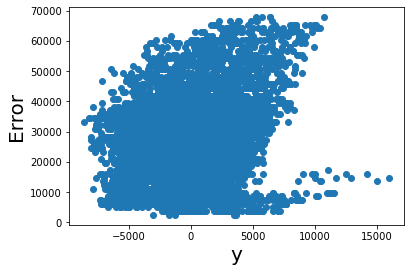

In [105]:
plt.scatter((data_test['insurance_cost'] - olsmodel1.predict(x_test_st)), data_test['insurance_cost'])
plt.xlabel('y',fontsize = 20)
plt.ylabel('Error',fontsize = 20)
plt.show()

In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [107]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [108]:
i=0
for column in X.columns:
    if i < 26:
        print (column ,"--->",  vif[i])
        i = i+1


years_of_insurance_with_us ---> 1.5964094975327703
regular_checkup_lasy_year ---> 1.1634264830392531
visited_doctor_last_1_year ---> 1.03345631461522
cholesterol_level ---> 1.4274964057278534
daily_avg_steps ---> 1.0510993842834624
age ---> 1.0006764278102132
avg_glucose_level ---> 1.000999068998837
bmi ---> 1.1931542242702908
weight ---> 1.2185552792664447
Alcohol ---> 1.020559790842668
exercise ---> 1.0137933715012066
weight_change_in_last_one_year ---> 1.1710413486767848
fat_percentage ---> 1.0994977916888038
adventure_sports_1 ---> 1.0072296669527545
heart_decs_history_1 ---> 1.0263974875752353
other_major_decs_history_1 ---> 1.0539650268189251
Gender_Male ---> 1.2526096170930479
covered_by_any_other_company_Y ---> 1.0911217022002568
admitted_in_hospital_1 ---> 1.7278066529426952
Occupation_Business ---> inf
Occupation_Salried ---> inf
Occupation_Student ---> inf
smoking_status_Unknown ---> inf
smoking_status_formerly smoked ---> inf
smoking_status_never smoked ---> inf
smoking_sta

no correlation identified as the VIF values are less than 10

In [109]:
ANNR.fit(x_train_scaled,y_train)
ANNR_train_score = ANNR.score(x_train_scaled, y_train)
ANNR_test_score = ANNR.score(x_test_scaled, y_test)
ANNR_RMSE_train = np.sqrt(mean_squared_error(y_train,ANNR.predict(x_train_scaled)))
ANNR_RMSE_test = np.sqrt(mean_squared_error(y_test,ANNR.predict(x_test_scaled)))
# ANNR_MAPE = np.mean((np.abs(y_test - ANNR.predict(x_test_scaled)))/y_test*100)

print('Train RMSE :', ANNR_RMSE_train,'\nTest RMSE : ',ANNR_RMSE_test,'\nTraining Score : ',ANNR_train_score,
      '\nTest Score : ',ANNR_test_score ) #,'\nMAPE : ', ANNR_MAPE)


Train RMSE : 3036.0784619454976 
Test RMSE :  3144.550188905585 
Training Score :  0.9553569171299967 
Test Score :  0.9510675779953556


In [110]:
ANNR_feat_imp = [np.abs(i.mean()) for i in ANNR.coefs_[0]]

In [111]:
len(ANNR.coefs_[0])

26

In [112]:
len(ANNR_feat_imp)

26

In [113]:
len(x_test.columns)

26

In [114]:

for idx, col_name in enumerate(x_train.columns):
    print(col_name, ' : ', ANNR_feat_imp[idx])


years_of_insurance_with_us  :  0.9206202274760859
regular_checkup_lasy_year  :  0.9157458034954132
visited_doctor_last_1_year  :  0.37295595013722166
cholesterol_level  :  0.14177068839717297
daily_avg_steps  :  0.1319407727070301
age  :  0.026212185210733728
avg_glucose_level  :  0.12665693984425336
bmi  :  0.318438646440631
weight  :  14.323799849315355
Alcohol  :  0.01206490128352672
exercise  :  0.035247230245728775
weight_change_in_last_one_year  :  0.5163151715474644
fat_percentage  :  0.29125154063185477
adventure_sports_1  :  0.17518751283874984
heart_decs_history_1  :  0.3167670493337649
other_major_decs_history_1  :  0.08493140091301045
Gender_Male  :  0.19820419187984104
covered_by_any_other_company_Y  :  1.4690768277363324
admitted_in_hospital_1  :  0.5152140644742911
Occupation_Business  :  0.006356522003302416
Occupation_Salried  :  0.5172328460973276
Occupation_Student  :  0.0112652074246963
smoking_status_Unknown  :  0.48951388923819367
smoking_status_formerly smoked  :

In [115]:
ANNR_feat_imp

[0.9206202274760859,
 0.9157458034954132,
 0.37295595013722166,
 0.14177068839717297,
 0.1319407727070301,
 0.026212185210733728,
 0.12665693984425336,
 0.318438646440631,
 14.323799849315355,
 0.01206490128352672,
 0.035247230245728775,
 0.5163151715474644,
 0.29125154063185477,
 0.17518751283874984,
 0.3167670493337649,
 0.08493140091301045,
 0.19820419187984104,
 1.4690768277363324,
 0.5152140644742911,
 0.006356522003302416,
 0.5172328460973276,
 0.0112652074246963,
 0.48951388923819367,
 0.5139655065554986,
 0.918413284354569,
 0.2335267279283294]

In [116]:
DTR.fit(x_train,y_train)
DTR_train_score = DTR.score(x_train, y_train)
DTR_test_score = DTR.score(x_test, y_test)
DTR_RMSE_train = np.sqrt(mean_squared_error(y_train,DTR.predict(x_train)))
DTR_RMSE_test = np.sqrt(mean_squared_error(y_test,DTR.predict(x_test)))
#DTR_MAPE = np.mean((np.abs(y_test - DTR.predict(x_test)))/y_test*100)

print('Train RMSE :', DTR_RMSE_train,'\nTest RMSE : ',DTR_RMSE_test,'\nTraining Score : ',DTR_train_score,
      '\nTest Score : ',DTR_test_score ) #,'\nMAPE : ', DTR_MAPE)

Train RMSE : 0.0 
Test RMSE :  4304.803296040366 
Training Score :  1.0 
Test Score :  0.9082964234051147


In [117]:
DTR_importances = DTR.feature_importances_
DTR_importances

array([2.74062862e-03, 2.18120896e-03, 1.86120638e-03, 1.41954723e-03,
       5.64010142e-03, 4.79076254e-03, 5.96971762e-03, 5.41768837e-03,
       9.51646727e-01, 1.13652640e-03, 1.26743751e-03, 2.85644917e-03,
       3.91985795e-03, 3.94500306e-04, 3.22090374e-04, 4.64358415e-04,
       5.73346883e-04, 2.48045945e-03, 1.36866778e-03, 4.26167997e-04,
       3.58414808e-04, 5.33670307e-04, 5.92068546e-04, 5.31499881e-04,
       5.90919356e-04, 5.15976841e-04])

In [119]:
x_train.columns

Index(['years_of_insurance_with_us', 'regular_checkup_lasy_year',
       'visited_doctor_last_1_year', 'cholesterol_level', 'daily_avg_steps',
       'age', 'avg_glucose_level', 'bmi', 'weight', 'Alcohol', 'exercise',
       'weight_change_in_last_one_year', 'fat_percentage',
       'adventure_sports_1', 'heart_decs_history_1',
       'other_major_decs_history_1', 'Gender_Male',
       'covered_by_any_other_company_Y', 'admitted_in_hospital_1',
       'Occupation_Business', 'Occupation_Salried', 'Occupation_Student',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [121]:

for idx, col_name in enumerate(x_train.columns):
    print(col_name, ' : ', DTR_importances[idx])

years_of_insurance_with_us  :  0.002740628620494587
regular_checkup_lasy_year  :  0.0021812089600167033
visited_doctor_last_1_year  :  0.0018612063768868327
cholesterol_level  :  0.0014195472311156567
daily_avg_steps  :  0.005640101418416304
age  :  0.004790762541046878
avg_glucose_level  :  0.005969717623380589
bmi  :  0.005417688374898547
weight  :  0.9516467268813121
Alcohol  :  0.0011365263990890662
exercise  :  0.0012674375086667404
weight_change_in_last_one_year  :  0.002856449172934262
fat_percentage  :  0.003919857948930131
adventure_sports_1  :  0.00039450030574334134
heart_decs_history_1  :  0.00032209037422414004
other_major_decs_history_1  :  0.00046435841537042263
Gender_Male  :  0.0005733468831334305
covered_by_any_other_company_Y  :  0.0024804594460752514
admitted_in_hospital_1  :  0.0013686677833253914
Occupation_Business  :  0.00042616799726759264
Occupation_Salried  :  0.00035841480750944385
Occupation_Student  :  0.0005336703065044398
smoking_status_Unknown  :  0.000

In [122]:
KNNR.fit(x_train_scaled,y_train)
KNNR_train_score  = KNNR.score(x_train_scaled, y_train)
KNNR_test_score = KNNR.score(x_test_scaled, y_test)
KNNR_RMSE_train = np.sqrt(mean_squared_error(y_train,KNNR.predict(x_train_scaled)))
KNNR_RMSE_test = np.sqrt(mean_squared_error(y_test,KNNR.predict(x_test_scaled)))
KNNR_MAPE = np.mean((np.abs(y_test - KNNR.predict(x_test_scaled)))/y_test*100)

print('Train RMSE :', KNNR_RMSE_train,'\nTest RMSE : ',KNNR_RMSE_test,'\nTraining Score : ',KNNR_train_score,
      '\nTest Score : ',KNNR_test_score,'\nMAPE : ', KNNR_MAPE)

Train RMSE : 6712.080847053362 
Test RMSE :  8225.102628657387 
Training Score :  0.7818061257973727 
Test Score :  0.665217843752506 
MAPE :  insurance_cost    37.942066
dtype: float64


In [123]:
RFR.fit(x_train,y_train)
RFR_train_score = RFR.score(x_train, y_train)
RFR_test_score = RFR.score(x_test, y_test)
RFR_RMSE_train = np.sqrt(mean_squared_error(y_train,RFR.predict(x_train)))
RFR_RMSE_test = np.sqrt(mean_squared_error(y_test,RFR.predict(x_test)))
#RFR_MAPE = np.mean((np.abs(y_test - RFR.predict(x_test)))/y_test*100)


print('Train RMSE :', RFR_RMSE_train,'\nTest RMSE : ',RFR_RMSE_test,'\nTraining Score : ',RFR_train_score,
      '\nTest Score : ',RFR_test_score) #'\nMAPE : ', RFR_MAPE)

Train RMSE : 1163.2232144763668 
Test RMSE :  3119.2196483929674 
Training Score :  0.9934467864979843 
Test Score :  0.9518527411283347


In [124]:
RFR_importances = RFR.feature_importances_
RFR_importances

array([2.74547385e-03, 2.36771575e-03, 1.76775601e-03, 1.37575799e-03,
       5.92374166e-03, 4.90908266e-03, 5.56548346e-03, 5.64776506e-03,
       9.51879930e-01, 1.08191700e-03, 1.14844849e-03, 2.86262290e-03,
       3.85027077e-03, 3.73252564e-04, 2.90878942e-04, 4.20936886e-04,
       5.90351757e-04, 2.44844604e-03, 1.30270674e-03, 4.37605206e-04,
       3.98186141e-04, 4.80957882e-04, 5.50106166e-04, 4.88399824e-04,
       6.02773539e-04, 4.89433099e-04])

In [163]:
for idx, col_name in enumerate(x_train.columns):
    print(col_name, ' : ', RFR_importances[idx])

years_of_insurance_with_us  :  0.0027454738548875904
regular_checkup_lasy_year  :  0.002367715748584152
visited_doctor_last_1_year  :  0.00176775601373775
cholesterol_level  :  0.001375757994918475
daily_avg_steps  :  0.005923741664978688
age  :  0.004909082664868373
avg_glucose_level  :  0.005565483462788077
bmi  :  0.005647765064391344
weight  :  0.9518799295942886
Alcohol  :  0.0010819170021755915
exercise  :  0.001148448485972283
weight_change_in_last_one_year  :  0.002862622898121056
fat_percentage  :  0.003850270768463307
adventure_sports_1  :  0.00037325256443513006
heart_decs_history_1  :  0.00029087894179154146
other_major_decs_history_1  :  0.00042093688625307604
Gender_Male  :  0.0005903517569850253
covered_by_any_other_company_Y  :  0.0024484460354373865
admitted_in_hospital_1  :  0.001302706740048703
Occupation_Business  :  0.00043760520582127315
Occupation_Salried  :  0.0003981861406229321
Occupation_Student  :  0.000480957881547508
smoking_status_Unknown  :  0.0005501061

In [125]:
ADB.fit(x_train,y_train)
ADB_train_score = ADB.score(x_train, y_train)
ADB_test_score = ADB.score(x_test, y_test)
ADB_RMSE_train = np.sqrt(mean_squared_error(y_train,ADB.predict(x_train)))
ADB_RMSE_test = np.sqrt(mean_squared_error(y_test,ADB.predict(x_test)))
#ADB_MAPE = np.mean((np.abs(y_test - ADB.predict(x_test)))/y_test*100)


print('Train RMSE :', ADB_RMSE_train,'\nTest RMSE : ',ADB_RMSE_test,'\nTraining Score : ',ADB_train_score,
      '\nTest Score : ',ADB_test_score) #'\nMAPE : ', ADB_MAPE)

Train RMSE : 3266.2905994047483 
Test RMSE :  3260.4907368055133 
Training Score :  0.948330074224546 
Test Score :  0.9473927509112419


In [126]:
ADB_importances = ADB.feature_importances_
ADB_importances

array([0.00000000e+00, 1.56638227e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.90262063e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.73811411e-03, 4.33441085e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [164]:
for idx, col_name in enumerate(x_train.columns):
    print(col_name, ' : ', ADB_importances[idx])

years_of_insurance_with_us  :  0.0
regular_checkup_lasy_year  :  0.001566382267590647
visited_doctor_last_1_year  :  0.0
cholesterol_level  :  0.0
daily_avg_steps  :  0.0
age  :  0.0
avg_glucose_level  :  0.0
bmi  :  0.0
weight  :  0.9902620625346875
Alcohol  :  0.0
exercise  :  0.0
weight_change_in_last_one_year  :  0.0
fat_percentage  :  0.0
adventure_sports_1  :  0.0
heart_decs_history_1  :  0.0
other_major_decs_history_1  :  0.0
Gender_Male  :  0.0
covered_by_any_other_company_Y  :  0.0077381141122542605
admitted_in_hospital_1  :  0.0004334410854675346
Occupation_Business  :  0.0
Occupation_Salried  :  0.0
Occupation_Student  :  0.0
smoking_status_Unknown  :  0.0
smoking_status_formerly smoked  :  0.0
smoking_status_never smoked  :  0.0
smoking_status_smokes  :  0.0


In [127]:
GB.fit(x_train,y_train)
GB_train_score = GB.score(x_train, y_train)
GB_test_score = GB.score(x_test, y_test)
GB_RMSE_train = np.sqrt(mean_squared_error(y_train,GB.predict(x_train)))
GB_RMSE_test = np.sqrt(mean_squared_error(y_test,GB.predict(x_test)))
#GB_MAPE = np.mean((np.abs(y_test - GB.predict(x_test)))/y_test*100)


print('Train RMSE :', GB_RMSE_train,'\nTest RMSE : ',GB_RMSE_test,'\nTraining Score : ',GB_train_score,
      '\nTest Score : ',GB_test_score ) #,'\nMAPE : ', GB_MAPE)

Train RMSE : 2966.3820392911284 
Test RMSE :  3006.1044492186707 
Training Score :  0.9573830503352283 
Test Score :  0.9552814427140677


In [128]:
GB_importances = GB.feature_importances_
GB_importances

array([1.16612268e-04, 1.50580314e-03, 2.64052156e-05, 8.04154282e-06,
       1.12026302e-04, 1.03967486e-04, 8.76286843e-05, 8.19608593e-05,
       9.93691617e-01, 9.62155920e-06, 3.04028908e-05, 9.01858999e-04,
       3.13571687e-05, 2.55764466e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.41685610e-03, 8.26943796e-04, 5.43950454e-06,
       7.90936257e-06, 0.00000000e+00, 0.00000000e+00, 2.28637081e-06,
       7.68508336e-06, 0.00000000e+00])

In [165]:
for idx, col_name in enumerate(x_train.columns):
    print(col_name, ' : ', GB_importances[idx])

years_of_insurance_with_us  :  0.00011661226757550647
regular_checkup_lasy_year  :  0.001505803140072405
visited_doctor_last_1_year  :  2.6405215560874393e-05
cholesterol_level  :  8.041542816635297e-06
daily_avg_steps  :  0.0001120263019770891
age  :  0.00010396748619725713
avg_glucose_level  :  8.762868433198046e-05
bmi  :  8.196085925287635e-05
weight  :  0.9936916172259442
Alcohol  :  9.621559196115704e-06
exercise  :  3.0402890838980214e-05
weight_change_in_last_one_year  :  0.0009018589985738761
fat_percentage  :  3.135716874763759e-05
adventure_sports_1  :  2.5576446582227033e-05
heart_decs_history_1  :  0.0
other_major_decs_history_1  :  0.0
Gender_Male  :  0.0
covered_by_any_other_company_Y  :  0.0024168560953492122
admitted_in_hospital_1  :  0.0008269437956954015
Occupation_Business  :  5.439504539782063e-06
Occupation_Salried  :  7.909362574067781e-06
Occupation_Student  :  0.0
smoking_status_Unknown  :  0.0
smoking_status_formerly smoked  :  2.2863708096309546e-06
smoking_s

*************

In [129]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

In [130]:
def mape(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

LR = LinearRegression()

ANNR = MLPRegressor(hidden_layer_sizes=(50),random_state=123, max_iter=10000)#you are free to tweak the layer sizes
DTR = tree.DecisionTreeRegressor(random_state=123)
KNNR=KNeighborsRegressor()

RFR = RandomForestRegressor(random_state=123)
ADB = AdaBoostRegressor(n_estimators=100,random_state=1)
GB = GradientBoostingRegressor(random_state=1)

models=[LR,ANNR,DTR,KNNR,RFR,ADB,GB]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
mape_train=[]
mape_test=[]

for i in models:  # we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
    
    if ((i != ANNR) & (i != KNNR)) :
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
        mape_train.append(mape(y_train, i.predict(x_train)))
        mape_test.append(mape(y_test, i.predict(x_test)))
 
    else :
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        mape_train.append(mape(y_train, i.predict(x_train_scaled)))
        mape_test.append(mape(y_test, i.predict(x_test_scaled)))
        
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,
                    'Test Score': scores_test,'Training MAPE':mape_train,'Test MAPE': mape_test},
            index=['Linear-R','Artificial NN-R', 'DecisionTree-R', 'K-NearestNeighbourR','RandomForest-R','AdaBoosting','GradientBoosting']))

**MODEL TUNING**

**LASSO Regularization for Linear regression**

In [131]:
from sklearn.linear_model import Lasso

param_grid = { 'alpha':[10,50,100,500], 'max_iter' : [1000,10000], 'tol': [0.00001, 0.000001]}
  
lr = Lasso()    

grid_search = GridSearchCV(estimator = lr, param_grid = param_grid, cv = 3)

grid_search.fit(x_train_scaled,y_train_scaled)


GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [10, 50, 100, 500], 'max_iter': [1000, 10000],
                         'tol': [1e-05, 1e-06]})

In [132]:
print(grid_search.best_params_)

{'alpha': 10, 'max_iter': 1000, 'tol': 1e-05}


In [133]:
lasso = Lasso(alpha = 10, max_iter = 1000, tol= 1e-05) 
lasso.fit(x_train, y_train)


Lasso(alpha=10, tol=1e-05)

In [134]:
lasso_train_score = lasso.score(x_train, y_train)
lasso_test_score = lasso.score(x_test, y_test)
lasso_RMSE_train = np.sqrt(mean_squared_error(y_train,lasso.predict(x_train)))
lasso_RMSE_test = np.sqrt(mean_squared_error(y_test,lasso.predict(x_test)))
lasso_MAPE_train = mape(y_train, lasso.predict(x_train))
lasso_MAPE_test = mape(y_test, lasso.predict(x_test))


print('Train RMSE :', lasso_RMSE_train,'\nTest RMSE : ',lasso_RMSE_test,'\nTraining Score : ',lasso_train_score,
      '\nTest Score : ',lasso_test_score,'\nTrain MAPE : ', lasso_MAPE_train, '\nTest MAPE : ', lasso_MAPE_test)

for idx, col_name in enumerate(x_train.columns):
    print("\nThe coefficient for {} is {}".format(col_name, lasso.coef_[idx]))
    
intercept = lasso.intercept_[0]

print("\nThe intercept for our model is {}".format(intercept)) 

Train RMSE : 3372.001331015843 
Test RMSE :  3328.8890657852453 
Training Score :  0.9449314462985726 
Test Score :  0.9451624180501119 
Train MAPE :  15.334945056437583 
Test MAPE :  15.085816811042275

The coefficient for years_of_insurance_with_us is -82.40908363519614

The coefficient for regular_checkup_lasy_year is -362.519845724275

The coefficient for visited_doctor_last_1_year is -28.892696385993172

The coefficient for cholesterol_level is 21.915811414086217

The coefficient for daily_avg_steps is -0.028930943325905498

The coefficient for age is 2.7816975743849675

The coefficient for avg_glucose_level is 0.312733322410493

The coefficient for bmi is 0.32158506864650105

The coefficient for weight is 1486.1842565584766

The coefficient for Alcohol is 0.0

The coefficient for exercise is -0.0

The coefficient for weight_change_in_last_one_year is 161.07111302897556

The coefficient for fat_percentage is -0.8694877922350479

The coefficient for adventure_sports_1 is 0.0

The c

**Using Grid Search for ANN**

In [135]:
param_grid = {'hidden_layer_sizes':[(100),(100,100)], 
     "activation": ['identity',"tanh", "relu"], 
    "solver": ["sgd", "adam"], 'learning_rate' : ['constant', 'invscaling', 'adaptive'],
            'max_iter' : [300,500]}



#    hidden_layer_sizes=(100,),activation='relu', *,solver='adam', alpha=0.0001,
    # batch_size='auto', learning_rate='constant', learning_rate_init=0.001,power_t=0.5, max_iter=200, shuffle=True,
   # random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False,
   # validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000,





In [136]:
annr = MLPRegressor(max_iter=1000, random_state=123)

In [137]:
grid_search = GridSearchCV(estimator = annr, param_grid = param_grid, cv = 3, n_jobs=-1)

In [138]:
grid_search.fit(x_train_scaled,y_train)

GridSearchCV(cv=3, estimator=MLPRegressor(max_iter=1000, random_state=123),
             n_jobs=-1,
             param_grid={'activation': ['identity', 'tanh', 'relu'],
                         'hidden_layer_sizes': [100, (100, 100)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'max_iter': [300, 500], 'solver': ['sgd', 'adam']})

In [139]:
print(grid_search.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'max_iter': 300, 'solver': 'adam'}


In [140]:
annr_tuned = MLPRegressor(activation='relu', hidden_layer_sizes=(100,100), learning_rate = 'constant',max_iter = 300,
                    solver='adam',random_state=123)

In [141]:
annr_tuned.fit(x_train_scaled,y_train)

MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=300, random_state=123)

In [142]:
annr_score_train_tuned = annr_tuned.score(x_train_scaled, y_train)
annr_score_test_tuned = annr_tuned.score(x_test_scaled, y_test)
annr_rmse_train_tuned = np.sqrt(mean_squared_error(y_train,annr_tuned.predict(x_train_scaled)))
annr_rmse_test_tuned = np.sqrt(mean_squared_error(y_test,annr_tuned.predict(x_test_scaled)))
annr_mape_train_tuned = mape(y_train, annr_tuned.predict(x_train_scaled))
annr_mape_test_tuned =  mape(y_test, annr_tuned.predict(x_test_scaled))

In [143]:
print('The performance metrics of tuned ANNR are as follows \n')

print('Train RMSE :', annr_rmse_train_tuned,'\nTest RMSE : ',annr_rmse_test_tuned,'\nTraining Score : ',annr_score_train_tuned,
      '\nTest Score : ',annr_score_test_tuned , '\nTrain MAPE : ', annr_mape_train_tuned, '\nTest MAPE :', annr_mape_test_tuned)

The performance metrics of tuned ANNR are as follows 

Train RMSE : 2900.9246511778856 
Test RMSE :  3134.510572646639 
Training Score :  0.9592431047851959 
Test Score :  0.9513795326355802 
Train MAPE :  11.467930463096621 
Test MAPE : 12.633977549362521


In [144]:
ANNR_tuned_feat_imp = [np.abs(i.mean()) for i in annr_tuned.coefs_[0]]

In [145]:
ANNR_tuned_feat_imp

[0.06731442173054478,
 0.11048756986717004,
 0.017729707215932203,
 0.015123638709877863,
 0.0031767857002983914,
 0.020557598599555818,
 0.018308094248313776,
 0.03351014679046107,
 1.7438957505710235,
 0.012073662990444038,
 0.007838345243291682,
 0.03459375741021621,
 0.007319591700502102,
 0.07580538718126821,
 0.10093698308442127,
 0.06869819495682603,
 0.035208661079347676,
 0.08872220061130606,
 0.07395588660077779,
 5.43782795210801e-05,
 0.009912172445756455,
 0.03364768895764709,
 0.04515339501249969,
 0.043209345123050975,
 0.047285079485810996,
 0.032942302905109064]

In [167]:
for idx, col_name in enumerate(x_train.columns):
    print(col_name, ' : ', ANNR_tuned_feat_imp[idx])

years_of_insurance_with_us  :  0.06731442173054478
regular_checkup_lasy_year  :  0.11048756986717004
visited_doctor_last_1_year  :  0.017729707215932203
cholesterol_level  :  0.015123638709877863
daily_avg_steps  :  0.0031767857002983914
age  :  0.020557598599555818
avg_glucose_level  :  0.018308094248313776
bmi  :  0.03351014679046107
weight  :  1.7438957505710235
Alcohol  :  0.012073662990444038
exercise  :  0.007838345243291682
weight_change_in_last_one_year  :  0.03459375741021621
fat_percentage  :  0.007319591700502102
adventure_sports_1  :  0.07580538718126821
heart_decs_history_1  :  0.10093698308442127
other_major_decs_history_1  :  0.06869819495682603
Gender_Male  :  0.035208661079347676
covered_by_any_other_company_Y  :  0.08872220061130606
admitted_in_hospital_1  :  0.07395588660077779
Occupation_Business  :  5.43782795210801e-05
Occupation_Salried  :  0.009912172445756455
Occupation_Student  :  0.03364768895764709
smoking_status_Unknown  :  0.04515339501249969
smoking_statu


**Grid Search on Decision Tree**

In [146]:
param_grid = {
    'max_depth': [10,12,15],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [100,200,300,500],
}

dtr=tree.DecisionTreeRegressor(random_state=123)

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3, n_jobs=-1)


grid_search.fit(x_train,y_train)

print(grid_search.best_params_)

{'max_depth': 12, 'min_samples_leaf': 30, 'min_samples_split': 200}


In [147]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=123), n_jobs=-1,
             param_grid={'max_depth': [10, 12, 15],
                         'min_samples_leaf': [3, 15, 30],
                         'min_samples_split': [100, 200, 300, 500]})

In [148]:
print(grid_search.best_params_)

{'max_depth': 12, 'min_samples_leaf': 30, 'min_samples_split': 200}


In [149]:
dtr_tuned = tree.DecisionTreeRegressor(max_depth=12,min_samples_split=200,min_samples_leaf=30,random_state=123)

In [150]:
dtr_tuned.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=12, min_samples_leaf=30, min_samples_split=200,
                      random_state=123)

In [151]:
dtr_score_train_tuned = dtr_tuned.score(x_train, y_train)
dtr_score_test_tuned = dtr_tuned.score(x_test, y_test)
dtr_rmse_train_tuned = np.sqrt(mean_squared_error(y_train,dtr_tuned.predict(x_train)))
dtr_rmse_test_tuned = np.sqrt(mean_squared_error(y_test,dtr_tuned.predict(x_test)))
dtr_mape_train_tuned = mape(y_train, dtr_tuned.predict(x_train))
dtr_mape_test_tuned =  mape(y_test, dtr_tuned.predict(x_test))

In [152]:
print('The performance metrics of tuned Decision Tree Regressor are as follows \n')

print('Train RMSE :', dtr_rmse_train_tuned,'\nTest RMSE : ',dtr_rmse_test_tuned,'\nTraining Score : ',dtr_score_train_tuned,
      '\nTest Score : ',dtr_score_test_tuned , '\nTrain MAPE : ', dtr_mape_train_tuned, '\nTest MAPE :', dtr_mape_test_tuned)

The performance metrics of tuned Decision Tree Regressor are as follows 

Train RMSE : 2967.825542839686 
Test RMSE :  3101.8801090941215 
Training Score :  0.9573415636452747 
Test Score :  0.9523865482590652 
Train MAPE :  11.340383921729368 
Test MAPE : 11.776025828804626


In [153]:
DTR_tuned_importances = dtr_tuned.feature_importances_
DTR_tuned_importances

array([1.90558180e-04, 1.20432690e-03, 6.28427003e-05, 9.92757243e-06,
       2.11270849e-04, 9.02031616e-05, 1.68515597e-04, 2.02728710e-04,
       9.93659595e-01, 1.06811640e-05, 4.15033187e-05, 8.59521234e-04,
       1.19590239e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.35725648e-05, 2.27119193e-03, 7.81460504e-04, 3.18488300e-05,
       4.05770109e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00848133e-05])

In [166]:
for idx, col_name in enumerate(x_train.columns):
    print(col_name, ' : ', DTR_tuned_importances[idx])

years_of_insurance_with_us  :  0.0001905581798309867
regular_checkup_lasy_year  :  0.001204326904693416
visited_doctor_last_1_year  :  6.284270034428377e-05
cholesterol_level  :  9.927572432461248e-06
daily_avg_steps  :  0.00021127084899784815
age  :  9.02031615612401e-05
avg_glucose_level  :  0.00016851559695210967
bmi  :  0.00020272870990126915
weight  :  0.9936595947150285
Alcohol  :  1.0681163991590269e-05
exercise  :  4.150331874035278e-05
weight_change_in_last_one_year  :  0.0008595212344656685
fat_percentage  :  0.00011959023870723246
adventure_sports_1  :  0.0
heart_decs_history_1  :  0.0
other_major_decs_history_1  :  0.0
Gender_Male  :  3.3572564787621846e-05
covered_by_any_other_company_Y  :  0.002271191930880469
admitted_in_hospital_1  :  0.0007814605044404939
Occupation_Business  :  3.184883000112091e-05
Occupation_Salried  :  4.057701092198208e-05
Occupation_Student  :  0.0
smoking_status_Unknown  :  0.0
smoking_status_formerly smoked  :  0.0
smoking_status_never smoked  

**Using Grid Search for Random Forest**

In [154]:
param_grid = {
    'max_depth': [10,12,15],
    'max_features': [5,8,13],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [30, 50,100],
    'n_estimators': [300, 500]
}

rfr = RandomForestRegressor(random_state=123)

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3, n_jobs=-1)

In [155]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=123), n_jobs=-1,
             param_grid={'max_depth': [10, 12, 15], 'max_features': [5, 8, 13],
                         'min_samples_leaf': [3, 15, 30],
                         'min_samples_split': [30, 50, 100],
                         'n_estimators': [300, 500]})

In [156]:
print(grid_search.best_params_)

{'max_depth': 12, 'max_features': 13, 'min_samples_leaf': 3, 'min_samples_split': 30, 'n_estimators': 500}


In [157]:
rfr_tuned = RandomForestRegressor(max_depth=12, max_features=13, 
                            min_samples_leaf= 3,
                            min_samples_split= 30, n_estimators= 500,
                            random_state=123)

In [158]:
rfr_tuned.fit(x_train,y_train)

RandomForestRegressor(max_depth=12, max_features=13, min_samples_leaf=3,
                      min_samples_split=30, n_estimators=500, random_state=123)

In [159]:
rfr_score_train_tuned = rfr_tuned.score(x_train, y_train)
rfr_score_test_tuned = rfr_tuned.score(x_test, y_test)
rfr_rmse_train_tuned = np.sqrt(mean_squared_error(y_train,rfr_tuned.predict(x_train)))
rfr_rmse_test_tuned = np.sqrt(mean_squared_error(y_test,rfr_tuned.predict(x_test)))
rfr_mape_train_tuned = mape(y_train, rfr_tuned.predict(x_train))
rfr_mape_test_tuned =  mape(y_test, rfr_tuned.predict(x_test))

In [160]:
print('The performance metrics of tuned Random Forest Regressor are as follows \n')

print('Train RMSE :', rfr_rmse_train_tuned,'\nTest RMSE : ',rfr_rmse_test_tuned,'\nTraining Score : ',rfr_score_train_tuned,
      '\nTest Score : ',rfr_score_test_tuned , '\nTrain MAPE : ', rfr_mape_train_tuned, '\nTest MAPE :', rfr_mape_test_tuned)

The performance metrics of tuned Random Forest Regressor are as follows 

Train RMSE : 2627.024016123567 
Test RMSE :  3040.4305230111086 
Training Score :  0.9665761647510478 
Test Score :  0.9542543483361926 
Train MAPE :  10.165959794523536 
Test MAPE : 11.74648179075023


In [161]:
RFR_tuned_importances = rfr_tuned.feature_importances_
RFR_tuned_importances

array([2.20065202e-03, 8.36370061e-03, 4.63785666e-04, 3.93353640e-04,
       1.88711188e-03, 1.58181075e-03, 1.79949262e-03, 1.80950712e-03,
       9.07428073e-01, 2.64117067e-04, 3.20902260e-04, 6.10739675e-02,
       1.21083744e-03, 4.35366947e-04, 9.49568496e-05, 1.30653912e-04,
       1.36432900e-04, 3.71633576e-03, 5.78870772e-03, 1.25685988e-04,
       1.14545697e-04, 1.27713234e-04, 1.26185295e-04, 1.30521266e-04,
       1.38248432e-04, 1.37334136e-04])

In [168]:
for idx, col_name in enumerate(x_train.columns):
    print(col_name, ' : ', RFR_tuned_importances[idx])

years_of_insurance_with_us  :  0.0022006520209460413
regular_checkup_lasy_year  :  0.008363700613333417
visited_doctor_last_1_year  :  0.00046378566643187413
cholesterol_level  :  0.0003933536395387619
daily_avg_steps  :  0.001887111881269882
age  :  0.0015818107495918108
avg_glucose_level  :  0.001799492622225839
bmi  :  0.001809507118437319
weight  :  0.9074280732995905
Alcohol  :  0.00026411706698084304
exercise  :  0.00032090226007626936
weight_change_in_last_one_year  :  0.06107396749841395
fat_percentage  :  0.0012108374350750608
adventure_sports_1  :  0.0004353669470258518
heart_decs_history_1  :  9.495684957004252e-05
other_major_decs_history_1  :  0.00013065391244969203
Gender_Male  :  0.00013643290021383178
covered_by_any_other_company_Y  :  0.0037163357562148033
admitted_in_hospital_1  :  0.005788707715590724
Occupation_Business  :  0.00012568598812521045
Occupation_Salried  :  0.00011454569743934743
Occupation_Student  :  0.00012771323356407737
smoking_status_Unknown  :  0.